# 🔬 Master Notebook — Комплексный анализ матриц

Этот ноутбук объединяет **всю функциональность** из репозитория:
- Построение матриц L с использованием `matrix_analysis`
- Визуализация с кастомными colormaps
- Анализ собственных значений и векторов
- Проверка всех теоретических собственных векторов
- Вычисление ранга и характеристического многочлена
- Экспорт результатов

📝 **Инструкция:** Запустите ячейки последовательно. В Google Colab пакет установится автоматически.

In [340]:
# --- Окружение: Colab / локально ---
import sys, os
from pathlib import Path
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print('🔧 Running in Google Colab — installing package from GitHub...')
    !pip install --quiet git+https://github.com/Ruslan361/matrix_analys.git
else:
    !pip install numpy matplotlib seaborn sympy
    print('🏠 Running locally — настройка путей...')
    repo_root = Path.cwd()
    for p in [Path.cwd(), Path.cwd().parent, Path.cwd().parent.parent]:
        if (p / 'pyproject.toml').exists() or (p / 'setup.py').exists():
            repo_root = p
            break
    if str(repo_root) not in sys.path:
        sys.path.insert(0, str(repo_root))
    print(f'✅ Repo root: {repo_root}')

🏠 Running locally — настройка путей...
✅ Repo root: /home/ruslan/Downloads/matrix_analys


In [341]:
# Импорты стандартных библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import display, Markdown, HTML
from functools import reduce
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 11

print('📦 Базовые библиотеки импортированы')

📦 Базовые библиотеки импортированы


In [342]:
# Импорт функций из matrix_analysis
try:
    from matrix_analysis.build_L_matrix import build_L_matrix
    from matrix_analysis.visualize_matrix import visualize_matrix
    from matrix_analysis.visualize_eigenvalues import visualize_eigenvalues
    from matrix_analysis.display_matrix_blocks import display_matrix_blocks
    from matrix_analysis.compute_matrix_rank import compute_matrix_rank
    from matrix_analysis.create_custom_colormap import create_custom_colormap
    from matrix_analysis.save_matrix_to_file import save_matrix_to_file
    print('✅ Импорт из пакета matrix_analysis успешен')
except ImportError as e:
    print(f'⚠️  Импорт из пакета не удался: {e}')
    print('Попытка локального импорта...')
    try:
        sys.path.insert(0, './matrix_analysis')
        from build_L_matrix import build_L_matrix
        from visualize_matrix import visualize_matrix
        from visualize_eigenvalues import visualize_eigenvalues
        from display_matrix_blocks import display_matrix_blocks
        from compute_matrix_rank import compute_matrix_rank
        from create_custom_colormap import create_custom_colormap
        from save_matrix_to_file import save_matrix_to_file
        print('✅ Локальный импорт успешен')
    except ImportError as e2:
        print(f'❌ Критическая ошибка импорта: {e2}')
        print('Убедитесь что matrix_analysis установлен или доступен локально')

✅ Импорт из пакета matrix_analysis успешен


## ⚙️ Параметры матрицы

Настройте параметры построения матрицы. Можно использовать как простое присваивание, так и интерактивные виджеты ниже.

In [343]:
# Начальные параметры матрицы
PARAMS = {'n_1': 1, 'n1': 2, 'n2': 3, 'n3': 5, 'n4': 7}
display(Markdown(f'**Текущие параметры:** `{PARAMS}`'))

**Текущие параметры:** `{'n_1': 1, 'n1': 2, 'n2': 3, 'n3': 5, 'n4': 7}`

In [344]:
# 🎛️ Интерактивные виджеты для параметров (ipywidgets)
try:
    import ipywidgets as widgets
    from IPython.display import display as ipy_display
    
    print('🎛️ Интерактивные виджеты доступны!')
    
    # Создаем слайдеры
    slider_n1 = widgets.IntSlider(value=PARAMS['n1'], min=1, max=10, description='n₁:', style={'description_width': '50px'})
    slider_n2 = widgets.IntSlider(value=PARAMS['n2'], min=1, max=10, description='n₂:', style={'description_width': '50px'})
    slider_n3 = widgets.IntSlider(value=PARAMS['n3'], min=1, max=20, description='n₃:', style={'description_width': '50px'})
    slider_n4 = widgets.IntSlider(value=PARAMS['n4'], min=1, max=20, description='n₄:', style={'description_width': '50px'})
    
    # Компонуем в UI
    slider_box = widgets.VBox([slider_n1, slider_n2, slider_n3, slider_n4])
    
    # Кнопка применения
    apply_button = widgets.Button(
        description='✓ Применить параметры',
        button_style='success',
        tooltip='Обновить PARAMS',
        icon='check'
    )
    
    output_widget = widgets.Output()
    
    def on_apply_clicked(b):
        with output_widget:
            output_widget.clear_output()
            PARAMS['n1'] = int(slider_n1.value)
            PARAMS['n2'] = int(slider_n2.value)
            PARAMS['n3'] = int(slider_n3.value)
            PARAMS['n4'] = int(slider_n4.value)
            display(Markdown(f'✅ **Обновлено:** `{PARAMS}`'))
    
    apply_button.on_click(on_apply_clicked)
    
    ipy_display(Markdown('### Используйте слайдеры для изменения параметров:'))
    ipy_display(slider_box)
    ipy_display(apply_button)
    ipy_display(output_widget)
    
except ImportError:
    print('⚠️  ipywidgets не установлены')
    print('   Установите: pip install ipywidgets')
    print('   Для Jupyter Lab: jupyter labextension install @jupyter-widgets/jupyterlab-manager')

⚠️  ipywidgets не установлены
   Установите: pip install ipywidgets
   Для Jupyter Lab: jupyter labextension install @jupyter-widgets/jupyterlab-manager


## 🏗️ Вспомогательные функции

Определяем дополнительные функции для работы с матрицами (из других ноутбуков).

In [345]:
# Вспомогательные функции для построения матриц
def E(n):
    """Единичная матрица размера n×n"""
    return np.eye(n)

def I(rows, cols=None):
    """Матрица из единиц размера rows×cols"""
    if cols is None:
        cols = rows
    return np.ones((rows, cols))

def Z(rows, cols):
    """Нулевая матрица размера rows×cols"""
    return np.zeros((rows, cols))

def Il(n):
    """Вектор-строка из единиц размера 1×n"""
    return np.ones((1, n))

def Q_star(n):
    """
    Специальная матрица Q* размера n×(n-1):
    Первая строка из единиц, остальное — минус единичная матрица
    """
    if n <= 1:
        return np.empty((n, 0))
    return np.vstack([np.ones((1, n-1)), -np.eye(n-1)])

def Ew1r(n):
    """Единичная матрица с обнулённой последней строкой"""
    result = np.eye(n)
    if n > 0:
        result[n-1, :] = 0
    return result

print('✅ Вспомогательные функции определены')

✅ Вспомогательные функции определены


## 📊 Кастомная цветовая карта для визуализации

Создаём улучшенную colormap, адаптированную к диапазону значений матрицы.

In [346]:
from matplotlib.colors import LinearSegmentedColormap

def create_adaptive_colormap(matrix):
    """
    Создаёт кастомную colormap с центром в белом (0), 
    синим для -1, красным для +1.
    Автоматически адаптируется к диапазону значений матрицы.
    """
    v_abs_max = np.max(np.abs(matrix))
    if v_abs_max == 0:
        v_abs_max = 1
    
    if v_abs_max <= 1:
        nodes = [0.0, 0.5, 1.0]
        colors = ['blue', 'white', 'red']
    else:
        norm_minus_1 = (-1 + v_abs_max) / (2 * v_abs_max)
        norm_plus_1 = (1 + v_abs_max) / (2 * v_abs_max)
        nodes = [0.0, norm_minus_1, 0.5, norm_plus_1, 1.0]
        colors = ['#00004B', 'blue', 'white', 'red', '#4B0000']
    
    return LinearSegmentedColormap.from_list('adaptive_bwr', list(zip(nodes, colors)))

print('✅ Функция create_adaptive_colormap определена')

✅ Функция create_adaptive_colormap определена


## 🔨 Построение матрицы L

Строим матрицу L по заданным параметрам.

In [347]:
# Построение матрицы L
print(f'🚀 Построение матрицы L с параметрами: {PARAMS}')
start_time = datetime.now()

try:
    L, block_coords = build_L_matrix(**PARAMS)
    elapsed = (datetime.now() - start_time).total_seconds()
    
    print(f'✅ Матрица L построена за {elapsed:.3f} сек')
    print(f'   Размер: {L.shape[0]} × {L.shape[1]}')
    print(f'   Ненулевых элементов: {np.count_nonzero(L):,} из {L.size:,}')
    print(f'   Плотность: {np.count_nonzero(L)/L.size*100:.2f}%')
    
except Exception as e:
    print(f'❌ Ошибка при построении L: {e}')
    raise

🚀 Построение матрицы L с параметрами: {'n_1': 1, 'n1': 2, 'n2': 3, 'n3': 5, 'n4': 7}
✅ Матрица L построена за 0.003 сек
   Размер: 101 × 247
   Ненулевых элементов: 741 из 24,947
   Плотность: 2.97%


## 🎨 Визуализация матрицы L

Создаём визуализацию структуры матрицы L.

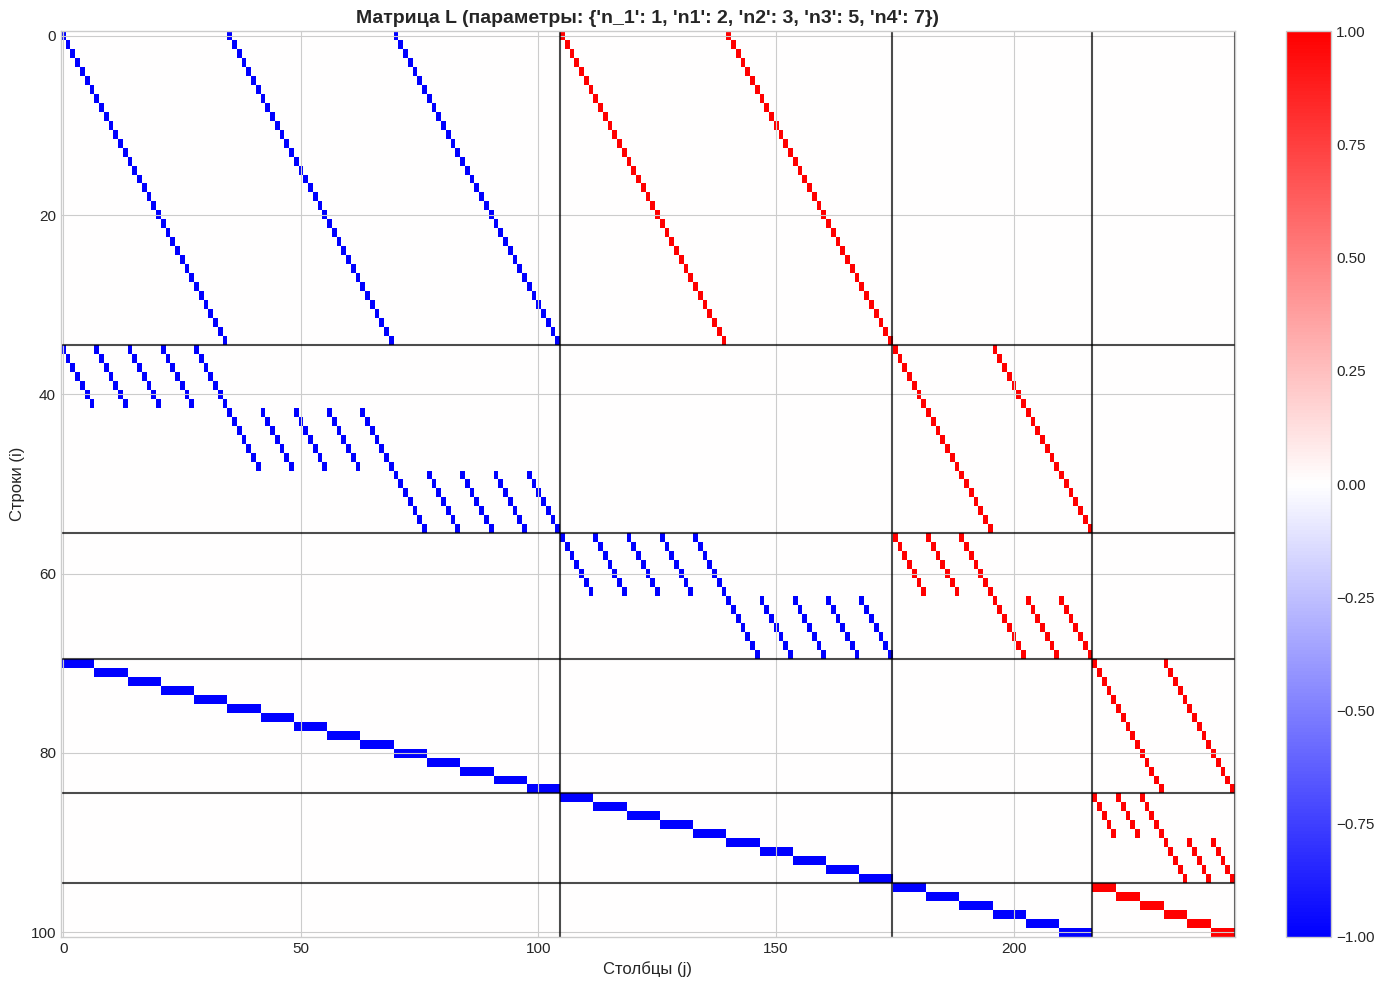

🎨 Визуализация матрицы L завершена


In [348]:
# Визуализация матрицы L
fig, ax = plt.subplots(figsize=(14, 10))

try:
    cmap = create_adaptive_colormap(L)
except:
    cmap = 'bwr'

im = ax.imshow(L, cmap=cmap, aspect='auto')
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# Добавляем границы блоков если есть
if block_coords and 'hlines' in block_coords:
    for y in block_coords['hlines']:
        ax.axhline(y=y-0.5, color='black', linewidth=1.5, alpha=0.7)
if block_coords and 'vlines' in block_coords:
    for x in block_coords['vlines']:
        ax.axvline(x=x-0.5, color='black', linewidth=1.5, alpha=0.7)

ax.set_title(f'Матрица L (параметры: {PARAMS})', fontsize=14, fontweight='bold')
ax.set_xlabel('Столбцы (j)', fontsize=12)
ax.set_ylabel('Строки (i)', fontsize=12)
plt.tight_layout()
plt.show()

print('🎨 Визуализация матрицы L завершена')

## 🔄 Вычисление L·L^T

Вычисляем произведение L·L^T для анализа собственных значений.

In [349]:
# Вычисление L·L^T
print('🔄 Вычисление L·L^T...')
start_time = datetime.now()

try:
    Lt = L.T
    L_LT = L @ Lt
    elapsed = (datetime.now() - start_time).total_seconds()
    
    print(f'✅ L·L^T вычислена за {elapsed:.3f} сек')
    print(f'   Размер: {L_LT.shape[0]} × {L_LT.shape[1]}')
    print(f'   Симметричность: {np.allclose(L_LT, L_LT.T)}')
    print(f'   Положительно полуопределённая: {np.all(np.linalg.eigvalsh(L_LT) >= -1e-10)}')
    
except Exception as e:
    print(f'❌ Ошибка при вычислении L·L^T: {e}')
    raise

🔄 Вычисление L·L^T...
✅ L·L^T вычислена за 0.000 сек
   Размер: 101 × 101
   Симметричность: True
   Положительно полуопределённая: True


## 🎨 Визуализация L·L^T с блочной структурой

Создаём детальную визуализацию матрицы L·L^T с выделением блоков.

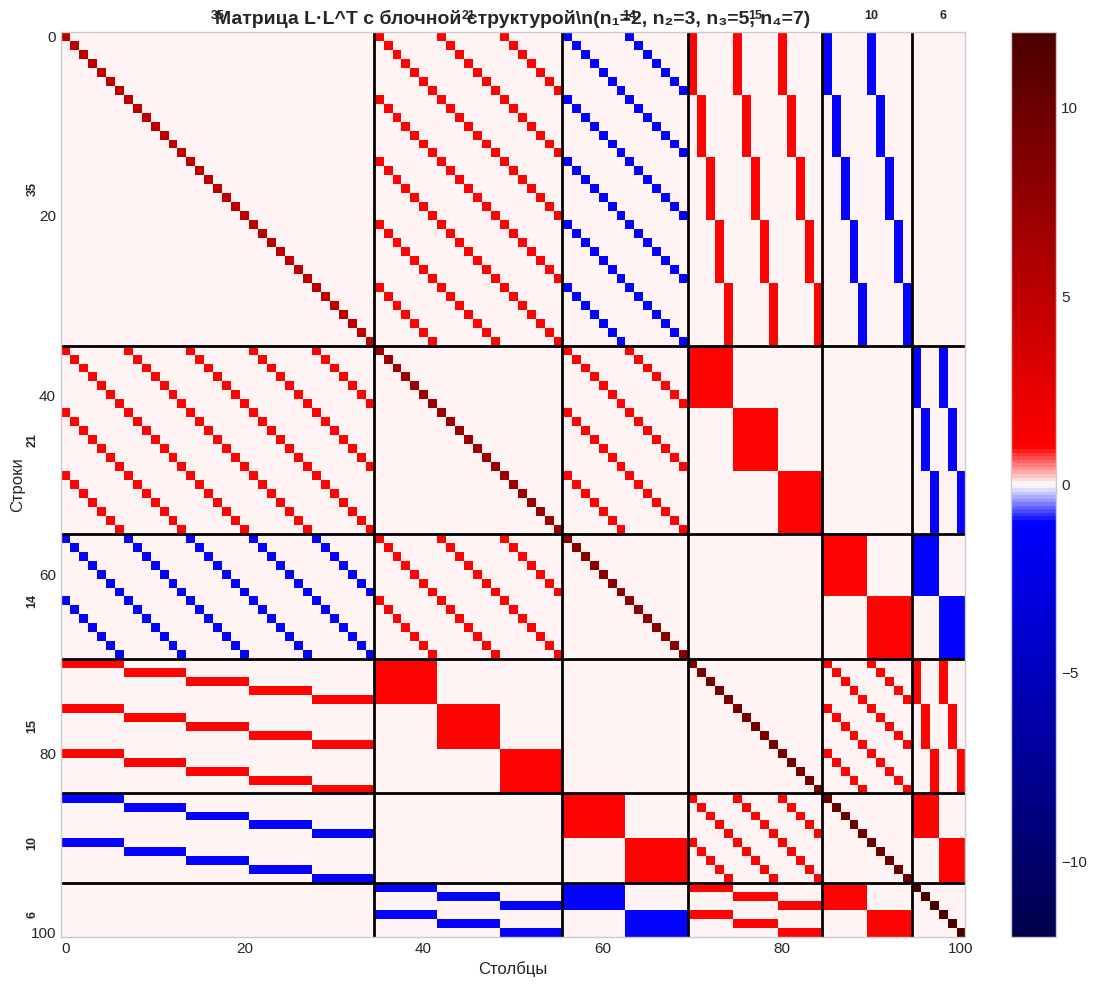

🎨 Визуализация L·L^T завершена


In [350]:
# Визуализация L·L^T с блоками
n1, n2, n3, n4 = PARAMS['n1'], PARAMS['n2'], PARAMS['n3'], PARAMS['n4']
block_sizes = [n3*n4, n2*n4, n1*n4, n2*n3, n1*n3, n1*n2]
block_boundaries = np.cumsum(block_sizes)[:-1]

fig, ax = plt.subplots(figsize=(12, 10))

try:
    cmap = create_adaptive_colormap(L_LT)
except:
    cmap = 'bwr'

v_abs_max = np.max(np.abs(L_LT))
im = ax.imshow(L_LT, cmap=cmap, vmin=-v_abs_max, vmax=v_abs_max, aspect='equal')
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# Рисуем границы блоков
for b in block_boundaries:
    ax.axvline(x=b - 0.5, color='black', linewidth=2, linestyle='-')
    ax.axhline(y=b - 0.5, color='black', linewidth=2, linestyle='-')

ax.set_title(f'Матрица L·L^T с блочной структурой\\n(n₁={n1}, n₂={n2}, n₃={n3}, n₄={n4})', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Столбцы', fontsize=12)
ax.set_ylabel('Строки', fontsize=12)
ax.grid(False)

# Добавляем размеры блоков
cumulative = 0
for i, size in enumerate(block_sizes):
    center = cumulative + size // 2
    ax.text(center, -3, f'{size}', ha='center', va='top', fontsize=9, fontweight='bold')
    ax.text(-3, center, f'{size}', ha='right', va='center', fontsize=9, fontweight='bold', rotation=90)
    cumulative += size

plt.tight_layout()
plt.show()

print('🎨 Визуализация L·L^T завершена')

## 🔍 Анализ собственных значений

Вычисляем собственные значения и векторы матрицы L·L^T.

In [351]:
# Вычисление собственных значений
print('🔍 Вычисление собственных значений...')
start_time = datetime.now()

try:
    eigenvalues_LLT, V_LLT = np.linalg.eigh(L_LT)
    elapsed = (datetime.now() - start_time).total_seconds()
    
    # Сортировка по убыванию
    idx = np.argsort(eigenvalues_LLT)[::-1]
    sorted_eigenvalues = eigenvalues_LLT[idx]
    sorted_eigenvectors = V_LLT[:, idx]
    
    print(f'✅ Собственные значения вычислены за {elapsed:.3f} сек')
    print(f'   Всего собственных значений: {len(sorted_eigenvalues)}')
    print(f'   Диапазон: [{np.min(sorted_eigenvalues):.6e}, {np.max(sorted_eigenvalues):.6e}]')
    
    # Топ-10 собственных значений
    print('\\n🔝 Топ-10 собственных значений (округлённые):')
    for i, val in enumerate(sorted_eigenvalues[:10]):
        print(f'   λ_{i+1:2d} = {int(round(val.real)):4d}')
    
    # Подсчёт кратностей
    eigenvalue_counts = {}
    tolerance = 1e-10
    for eig_val in sorted_eigenvalues:
        rounded = int(round(eig_val.real))
        if abs(eig_val.real) < tolerance:
            rounded = 0
        eigenvalue_counts[rounded] = eigenvalue_counts.get(rounded, 0) + 1
    
    print('\\n📊 Спектр (значение: кратность):')
    for val, count in sorted(eigenvalue_counts.items(), reverse=True):
        percentage = (count / len(sorted_eigenvalues)) * 100
        bar = '█' * min(int(percentage / 2), 25)
        print(f'   {val:4d}: {count:3d} ({percentage:5.1f}%) {bar}')
    
    # Сводка
    zero_count = np.sum(np.abs(sorted_eigenvalues) < tolerance)
    nonzero_count = len(sorted_eigenvalues) - zero_count
    print(f'\\n📈 Сводка:')
    print(f'   • Ненулевые: {nonzero_count}')
    print(f'   • Нулевые: {zero_count}')
    print(f'   • Числовой ранг: {nonzero_count}')
    
except Exception as e:
    print(f'❌ Ошибка при вычислении собственных значений: {e}')
    raise

🔍 Вычисление собственных значений...
✅ Собственные значения вычислены за 0.051 сек
   Всего собственных значений: 101
   Диапазон: [-4.583282e-15, 1.700000e+01]
\n🔝 Топ-10 собственных значений (округлённые):
   λ_ 1 =   17
   λ_ 2 =   17
   λ_ 3 =   17
   λ_ 4 =   15
   λ_ 5 =   15
   λ_ 6 =   14
   λ_ 7 =   14
   λ_ 8 =   14
   λ_ 9 =   14
   λ_10 =   12
\n📊 Спектр (значение: кратность):
     17:   3 (  3.0%) █
     15:   2 (  2.0%) 
     14:   4 (  4.0%) █
     12:  10 (  9.9%) ████
     10:  16 ( 15.8%) ███████
      9:   8 (  7.9%) ███
      8:   6 (  5.9%) ██
      7:  12 ( 11.9%) █████
      5:  24 ( 23.8%) ███████████
      0:  16 ( 15.8%) ███████
\n📈 Сводка:
   • Ненулевые: 85
   • Нулевые: 16
   • Числовой ранг: 85


## 📊 Визуализация спектра собственных значений

Создаём графики для анализа распределения собственных значений.

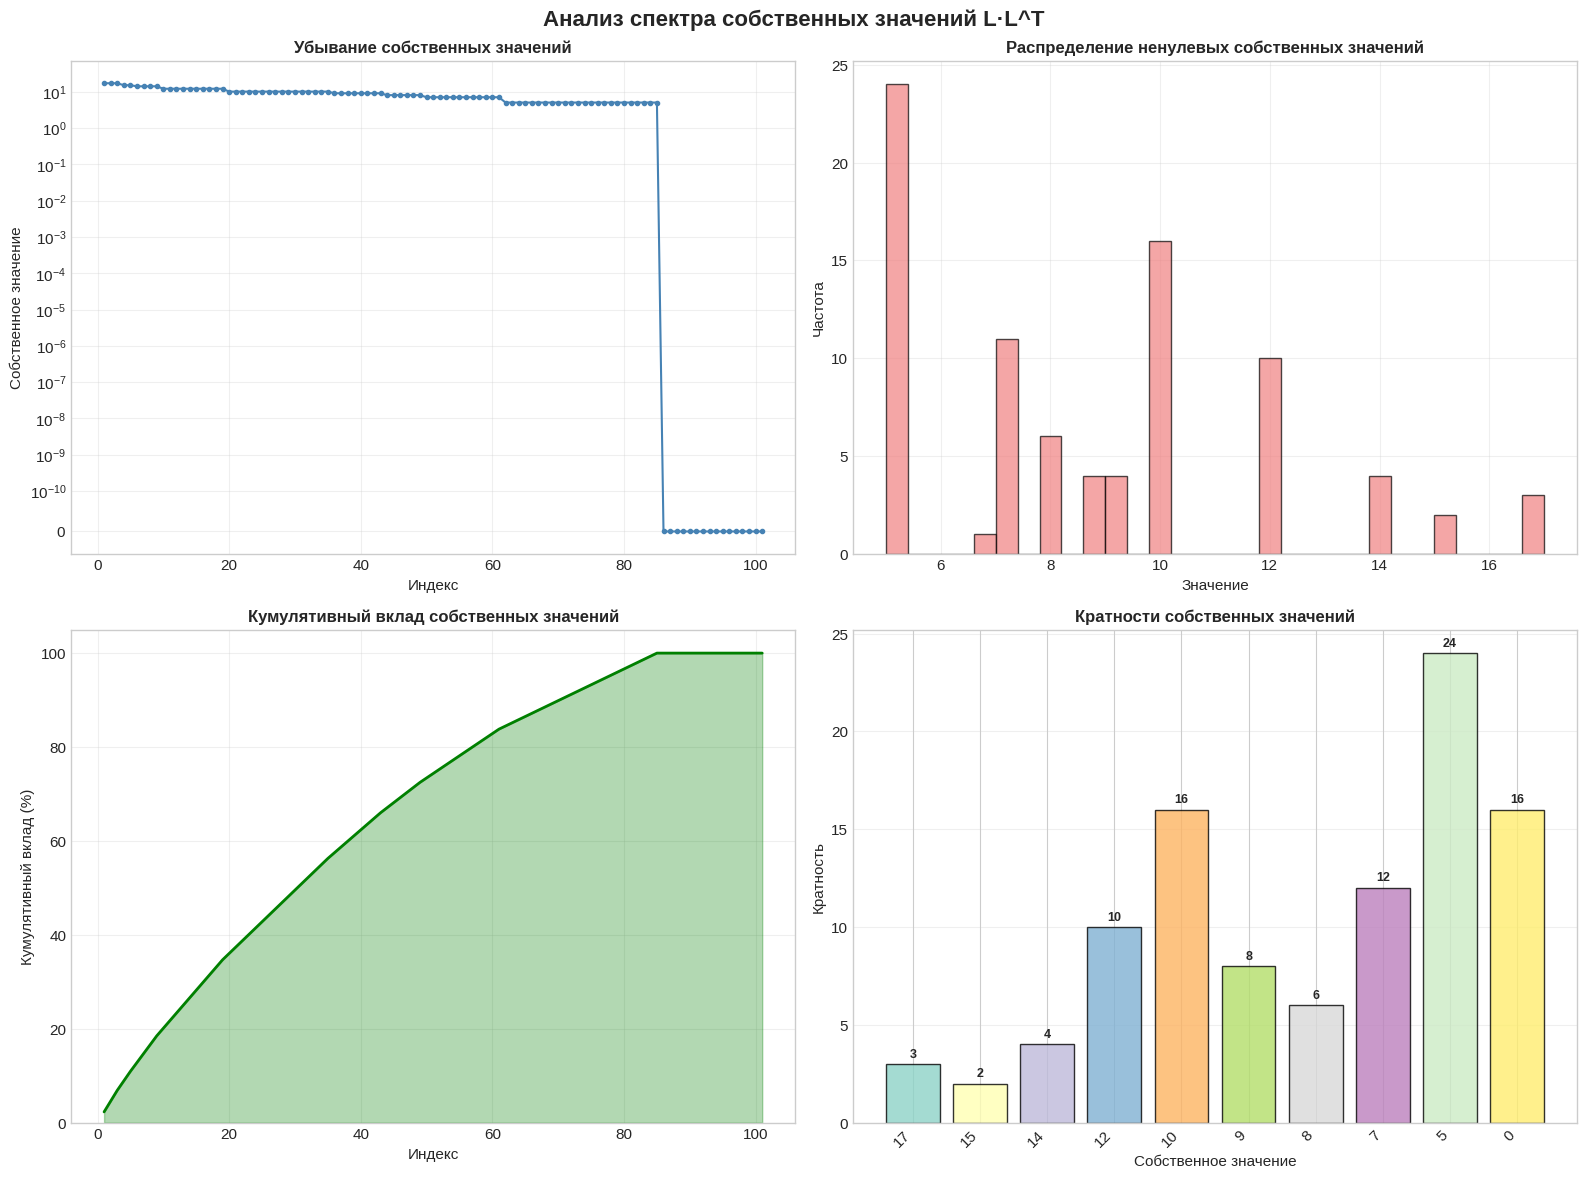

📊 Визуализация спектра завершена


In [352]:
# Визуализация спектра собственных значений
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Анализ спектра собственных значений L·L^T', fontsize=16, fontweight='bold')

# График 1: Убывание собственных значений
ax1 = axes[0, 0]
ax1.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, 
         'o-', color='steelblue', markersize=3, linewidth=1.5)
ax1.set_xlabel('Индекс', fontsize=11)
ax1.set_ylabel('Собственное значение', fontsize=11)
ax1.set_title('Убывание собственных значений', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_yscale('symlog', linthresh=1e-10)

# График 2: Гистограмма ненулевых
ax2 = axes[0, 1]
nonzero_vals = sorted_eigenvalues[sorted_eigenvalues > 1e-10]
if len(nonzero_vals) > 0:
    unique_vals = np.unique(nonzero_vals)
    bins = min(30, len(unique_vals))
    ax2.hist(nonzero_vals, bins=bins, color='lightcoral', alpha=0.7, edgecolor='black')
ax2.set_xlabel('Значение', fontsize=11)
ax2.set_ylabel('Частота', fontsize=11)
ax2.set_title('Распределение ненулевых собственных значений', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# График 3: Кумулятивный вклад
ax3 = axes[1, 0]
eigenval_sum = np.sum(sorted_eigenvalues[sorted_eigenvalues > 1e-10])
if eigenval_sum > 0:
    cumsum = np.cumsum(sorted_eigenvalues) / eigenval_sum * 100
    ax3.plot(range(1, len(cumsum) + 1), cumsum, color='green', linewidth=2)
    ax3.fill_between(range(1, len(cumsum) + 1), cumsum, alpha=0.3, color='green')
ax3.set_xlabel('Индекс', fontsize=11)
ax3.set_ylabel('Кумулятивный вклад (%)', fontsize=11)
ax3.set_title('Кумулятивный вклад собственных значений', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 105)

# График 4: Кратности
ax4 = axes[1, 1]
values = list(eigenvalue_counts.keys())
multiplicities = list(eigenvalue_counts.values())
colors_bar = plt.cm.Set3(np.linspace(0, 1, len(values)))
bars = ax4.bar(range(len(values)), multiplicities, color=colors_bar, alpha=0.8, edgecolor='black')
ax4.set_xlabel('Собственное значение', fontsize=11)
ax4.set_ylabel('Кратность', fontsize=11)
ax4.set_title('Кратности собственных значений', fontsize=12, fontweight='bold')
ax4.set_xticks(range(len(values)))
ax4.set_xticklabels([str(v) for v in values], rotation=45, ha='right')
ax4.grid(True, alpha=0.3, axis='y')

# Добавляем метки на столбцы
for bar, mult in zip(bars, multiplicities):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.2,
             f'{mult}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print('📊 Визуализация спектра завершена')

## 🔢 Вычисление ранга матриц

Определяем ранг матриц L и L·L^T различными методами.

In [353]:
# Вычисление рангов
print('🔢 Вычисление рангов матриц...')

try:
    rank_L = compute_matrix_rank(L)
except:
    rank_L = np.linalg.matrix_rank(L)

try:
    rank_LLT = compute_matrix_rank(L_LT)
except:
    rank_LLT = np.linalg.matrix_rank(L_LT)

rank_from_eig = np.sum(sorted_eigenvalues > 1e-10)

display(HTML(f'''
<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; border: 2px solid #4169e1;">
    <h3 style="color: #4169e1; margin-top: 0;">🔢 Результаты вычисления рангов</h3>
    <table style="width: 100%; border-collapse: collapse;">
        <tr style="background-color: #e6f2ff;">
            <th style="padding: 10px; text-align: left; border-bottom: 2px solid #4169e1;">Метод</th>
            <th style="padding: 10px; text-align: right; border-bottom: 2px solid #4169e1;">Ранг L</th>
            <th style="padding: 10px; text-align: right; border-bottom: 2px solid #4169e1;">Ранг L·L^T</th>
        </tr>
        <tr>
            <td style="padding: 10px; border-bottom: 1px solid #ddd;">NumPy SVD</td>
            <td style="padding: 10px; text-align: right; border-bottom: 1px solid #ddd; font-weight: bold; color: #d63384;">{rank_L}</td>
            <td style="padding: 10px; text-align: right; border-bottom: 1px solid #ddd; font-weight: bold; color: #d63384;">{rank_LLT}</td>
        </tr>
        <tr>
            <td style="padding: 10px; border-bottom: 1px solid #ddd;">Из собственных значений</td>
            <td style="padding: 10px; text-align: right; border-bottom: 1px solid #ddd;">—</td>
            <td style="padding: 10px; text-align: right; border-bottom: 1px solid #ddd; font-weight: bold; color: #d63384;">{rank_from_eig}</td>
        </tr>
    </table>
    <p style="margin-top: 15px; color: #495057;">
        <strong>Проверка консистентности:</strong> 
        {'✅ rank(L) = rank(L·L^T) = ' + str(rank_L) if rank_L == rank_LLT else '⚠️ Обнаружено несоответствие'}
    </p>
    <p style="color: #6c757d; font-size: 0.9em;">
        Дефицит ранга L: {min(L.shape) - rank_L} | 
        Размерность ядра L·L^T: {L_LT.shape[0] - rank_LLT}
    </p>
</div>
'''))

print(f'✅ Ранг L = {rank_L}, ранг L·L^T = {rank_LLT}')

🔢 Вычисление рангов матриц...


Метод,Ранг L,Ранг L·L^T
NumPy SVD,85,85
Из собственных значений,—,85


✅ Ранг L = 85, ранг L·L^T = 85


In [354]:
# Функция для поиска базисных строк через RREF
def find_basis_rows(matrix, tolerance=1e-10):
    """
    Находит базисные строки матрицы через приведённую ступенчатую форму.
    
    Возвращает:
        basis_indices: индексы базисных строк
        rref_matrix: матрица в RREF форме
    """
    try:
        import sympy as sp
        # Преобразуем в sympy Matrix для точного RREF
        M_sympy = sp.Matrix(matrix)
        rref_result, pivot_cols = M_sympy.rref()
        
        # Находим ненулевые строки
        basis_indices = []
        for i in range(rref_result.rows):
            row = np.array(rref_result.row(i)).astype(float).flatten()
            if np.max(np.abs(row)) > tolerance:
                basis_indices.append(i)
        
        rref_np = np.array(rref_result).astype(float)
        return basis_indices, rref_np
        
    except ImportError:
        print("⚠️  sympy не установлен, используется NumPy SVD")
        # Альтернатива через SVD
        U, s, Vt = np.linalg.svd(matrix, full_matrices=False)
        rank = np.sum(s > tolerance)
        basis_indices = list(range(rank))
        return basis_indices, matrix[:rank]

# Вычисление базисных строк для L
print('📐 Вычисление базисных строк для L...')
start_time = datetime.now()
try:
    basis_rows_L, rref_L = find_basis_rows(L)
    elapsed = (datetime.now() - start_time).total_seconds()
    
    print(f'✅ Базисные строки L найдены за {elapsed:.3f} сек')
    print(f'   Количество базисных строк: {len(basis_rows_L)}')
    print(f'   Индексы базисных строк: {basis_rows_L[:10]}{"..." if len(basis_rows_L) > 10 else ""}')
except Exception as e:
    print(f'⚠️  Ошибка при вычислении базисных строк L: {e}')
    basis_rows_L = []

# Вычисление базисных строк для L·L^T
print('\n📐 Вычисление базисных строк для L·L^T...')
start_time = datetime.now()
try:
    basis_rows_LLT, rref_LLT = find_basis_rows(L_LT)
    elapsed = (datetime.now() - start_time).total_seconds()
    
    print(f'✅ Базисные строки L·L^T найдены за {elapsed:.3f} сек')
    print(f'   Количество базисных строк: {len(basis_rows_LLT)}')
    print(f'   Индексы базисных строк: {basis_rows_LLT[:10]}{"..." if len(basis_rows_LLT) > 10 else ""}')
    
    # Отображаем красивую таблицу
    display(HTML(f'''
    <div style="background-color: #f0fff4; padding: 20px; border-radius: 10px; border: 2px solid #2d8659;">
        <h3 style="color: #2d8659; margin-top: 0;">📐 Базисные строки матриц</h3>
        <table style="width: 100%; border-collapse: collapse; margin-top: 10px;">
            <tr style="background-color: #d4f1e3;">
                <th style="padding: 10px; text-align: left; border-bottom: 2px solid #2d8659;">Матрица</th>
                <th style="padding: 10px; text-align: center; border-bottom: 2px solid #2d8659;">Размер</th>
                <th style="padding: 10px; text-align: center; border-bottom: 2px solid #2d8659;">Ранг</th>
                <th style="padding: 10px; text-align: center; border-bottom: 2px solid #2d8659;">Базисных строк</th>
            </tr>
            <tr>
                <td style="padding: 10px; border-bottom: 1px solid #ddd; font-weight: bold;">L</td>
                <td style="padding: 10px; text-align: center; border-bottom: 1px solid #ddd;">{L.shape[0]} × {L.shape[1]}</td>
                <td style="padding: 10px; text-align: center; border-bottom: 1px solid #ddd; color: #d63384; font-weight: bold;">{rank_L}</td>
                <td style="padding: 10px; text-align: center; border-bottom: 1px solid #ddd; color: #2d8659; font-weight: bold;">{len(basis_rows_L)}</td>
            </tr>
            <tr>
                <td style="padding: 10px; border-bottom: 1px solid #ddd; font-weight: bold;">L·L^T</td>
                <td style="padding: 10px; text-align: center; border-bottom: 1px solid #ddd;">{L_LT.shape[0]} × {L_LT.shape[1]}</td>
                <td style="padding: 10px; text-align: center; border-bottom: 1px solid #ddd; color: #d63384; font-weight: bold;">{rank_LLT}</td>
                <td style="padding: 10px; text-align: center; border-bottom: 1px solid #ddd; color: #2d8659; font-weight: bold;">{len(basis_rows_LLT)}</td>
            </tr>
        </table>
        <p style="margin-top: 15px; color: #495057; font-size: 0.95em;">
            <strong>Проверка:</strong> Количество базисных строк должно совпадать с рангом матрицы.
        </p>
    </div>
    '''))
    
except Exception as e:
    print(f'⚠️  Ошибка при вычислении базисных строк L·L^T: {e}')
    basis_rows_LLT = []

print('\n✅ Вычисление базисных строк завершено')

📐 Вычисление базисных строк для L...
✅ Базисные строки L найдены за 1.031 сек
   Количество базисных строк: 85
   Индексы базисных строк: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]...

📐 Вычисление базисных строк для L·L^T...
✅ Базисные строки L·L^T найдены за 4.283 сек
   Количество базисных строк: 101
   Индексы базисных строк: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]...


Матрица,Размер,Ранг,Базисных строк
L,101 × 247,85,85
L·L^T,101 × 101,85,101



✅ Вычисление базисных строк завершено


## 📐 Базисные строки матриц

Определяем базисные строки для L и L·L^T с использованием метода исключения Гаусса (RREF).

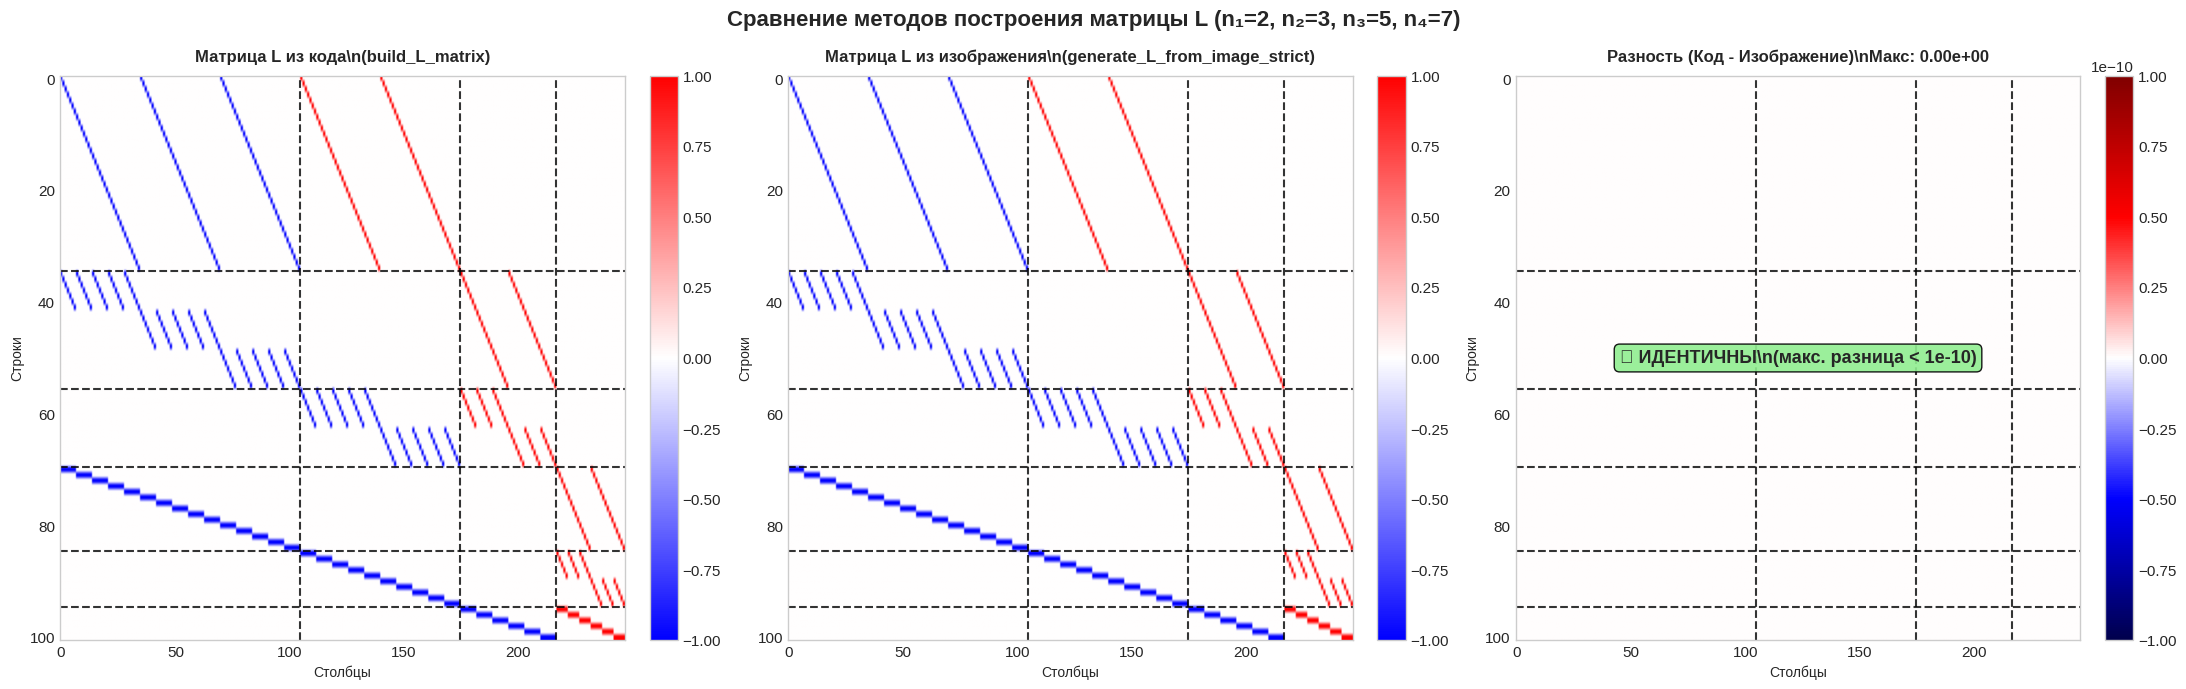

L из кода (build_L_matrix):,101 × 247
L из изображения (generate_L_from_image_strict):,101 × 247
Максимальная разность:,0.00e+00
Плотность (ненулевые элементы):,"Код: 2.97%, Изображение: 2.97%"



📊 Визуальное сравнение матриц L завершено


In [355]:

def generate_L_from_image_strict(n_1, n1, n2, n3, n4):

  block1_1 = -reduce(np.kron, [Il(1), Il(n2), E(n3), E(n4)])
  block1_2 = reduce(np.kron, [Il(n1), Il(1), E(n3), E(n4)])
  block1_3 = Z(n3*n4, n1*n2*n4)
  block1_4 = Z(n3*n4, n1*n2*n3)

  row1 = np.hstack([block1_1, block1_2, block1_3, block1_4])

  block2_1 = -reduce(np.kron, [Il(1), E(n2), Il(n3), E(n4)])
  block2_2 = Z(n2*n4, n1*n3*n4)
  block2_3 = reduce(np.kron, [Il(n1), E(n2), Il(1), E(n4)])
  block2_4 = Z(n2*n4, n1*n2*n3)

  row2 = np.hstack([block2_1, block2_2, block2_3, block2_4])

  block3_1 = Z(n1*n4, n2*n3*n4)
  block3_2 = -reduce(np.kron, [E(n1), Il(1), Il(n3), E(n4)])
  block3_3 = reduce(np.kron, [E(n1), Il(n2), Il(1), E(n4)])
  block3_4 = Z(n1*n4, n1*n2*n3)

  row3 = np.hstack([block3_1, block3_2, block3_3, block3_4])

  block4_1 = -reduce(np.kron, [Il(1), E(n2), E(n3), Il(n4)])
  block4_2 = Z(n2*n3, n1*n3*n4)
  block4_3 = Z(n2*n3, n1*n2*n4)
  block4_4 = reduce(np.kron, [Il(n1), E(n2), E(n3), Il(1)])

  row4 = np.hstack([block4_1, block4_2, block4_3, block4_4])

  block5_1 = Z(n1*n3, n2*n3*n4)
  block5_2 = -reduce(np.kron, [E(n1), Il(1), E(n3), Il(n4)])
  block5_3 = Z(n1*n3, n1*n2*n4)
  block5_4 = reduce(np.kron, [E(n1), Il(n2), E(n3), Il(1)])

  row5 = np.hstack([block5_1, block5_2, block5_3, block5_4])

  block6_1 = Z(n1*n2, n2*n3*n4)
  block6_2 = Z(n1*n2, n1*n3*n4)
  block6_3 = -reduce(np.kron, [E(n1), E(n2), Il(1), Il(n4)])
  block6_4 = reduce(np.kron, [E(n1), E(n2), Il(n3), Il(1)])

  row6 = np.hstack([block6_1, block6_2, block6_3, block6_4])

  return np.vstack([row1, row2, row3, row4, row5, row6]) # Added return statement
L_from_image = generate_L_from_image_strict(**PARAMS)
# Визуализация сравнения матриц L
if L_from_image is not None:
    fig, axes = plt.subplots(1, 3, figsize=(22, 7))
    fig.suptitle(f'Сравнение методов построения матрицы L (n₁={n1}, n₂={n2}, n₃={n3}, n₄={n4})', 
                 fontsize=16, fontweight='bold')
    
    # Границы блоков для L (горизонтальные и вертикальные)
    row_sizes_L = [n3*n4, n2*n4, n1*n4, n2*n3, n1*n3, n1*n2]
    row_boundaries_L = np.cumsum(row_sizes_L)[:-1]
    col_sizes_L = [n2*n3*n4, n1*n3*n4, n1*n2*n4, n1*n2*n3]
    col_boundaries_L = np.cumsum(col_sizes_L)[:-1]
    
    def draw_L_matrix(ax, matrix, title):
        """Рисует матрицу L с границами блоков"""
        v_abs_max = np.max(np.abs(matrix))
        if v_abs_max == 0:
            v_abs_max = 1
        
        im = ax.imshow(matrix, cmap='bwr', vmin=-v_abs_max, vmax=v_abs_max, aspect='auto')
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        
        # Горизонтальные границы
        for y_boundary in row_boundaries_L:
            ax.axhline(y=y_boundary - 0.5, color='black', linewidth=1.5, linestyle='--', alpha=0.8)
        
        # Вертикальные границы
        for x_boundary in col_boundaries_L:
            ax.axvline(x=x_boundary - 0.5, color='black', linewidth=1.5, linestyle='--', alpha=0.8)
        
        ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
        ax.set_xlabel('Столбцы', fontsize=10)
        ax.set_ylabel('Строки', fontsize=10)
        ax.grid(False)
    
    # График 1: L из кода (build_L_matrix)
    draw_L_matrix(axes[0], L, 'Матрица L из кода\\n(build_L_matrix)')
    
    # График 2: L из изображения
    draw_L_matrix(axes[1], L_from_image, 'Матрица L из изображения\\n(generate_L_from_image_strict)')
    
    # График 3: Разность
    L_diff = L - L_from_image
    v_abs_max_diff = np.max(np.abs(L_diff))
    
    if v_abs_max_diff < 1e-10:
        im = axes[2].imshow(L_diff, cmap='seismic', vmin=-1e-10, vmax=1e-10, aspect='auto')
        axes[2].text(0.5, 0.5, '✅ ИДЕНТИЧНЫ\\n(макс. разница < 1e-10)', 
                    transform=axes[2].transAxes, fontsize=13, fontweight='bold',
                    ha='center', va='center', 
                    bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.9))
    else:
        im = axes[2].imshow(L_diff, cmap='seismic', vmin=-v_abs_max_diff, vmax=v_abs_max_diff, aspect='auto')
    
    plt.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
    
    for y_boundary in row_boundaries_L:
        axes[2].axhline(y=y_boundary - 0.5, color='black', linewidth=1.5, linestyle='--', alpha=0.8)
    for x_boundary in col_boundaries_L:
        axes[2].axvline(x=x_boundary - 0.5, color='black', linewidth=1.5, linestyle='--', alpha=0.8)
    
    axes[2].set_title(f'Разность (Код - Изображение)\\nМакс: {v_abs_max_diff:.2e}', 
                     fontsize=12, fontweight='bold', pad=10)
    axes[2].set_xlabel('Столбцы', fontsize=10)
    axes[2].set_ylabel('Строки', fontsize=10)
    axes[2].grid(False)
    
    plt.tight_layout()
    plt.show()
    is_L_equal = v_abs_max_diff < 1e-10
    max_L_diff = v_abs_max_diff
    # HTML-отчёт о сравнении матриц L
    L_comparison_html = f'''
    <div style="background-color: {"#d4edda" if is_L_equal else "#fff3cd"}; padding: 20px; border-radius: 10px; 
                border: 2px solid {"#28a745" if is_L_equal else "#ffc107"}; margin-top: 15px;">
        <h3 style="color: {"#155724" if is_L_equal else "#856404"}; margin-top: 0;">
            {"✅ Методы построения матрицы L идентичны!" if is_L_equal else "⚠️ Обнаружены различия между методами построения L"}
        </h3>
        <table style="width: 100%; border-collapse: collapse; margin-top: 10px;">
            <tr>
                <td style="padding: 8px; font-weight: bold;">L из кода (build_L_matrix):</td>
                <td style="padding: 8px;">{L.shape[0]} × {L.shape[1]}</td>
            </tr>
            <tr>
                <td style="padding: 8px; font-weight: bold;">L из изображения (generate_L_from_image_strict):</td>
                <td style="padding: 8px;">{L_from_image.shape[0]} × {L_from_image.shape[1]}</td>
            </tr>
            <tr style="background-color: {"#c3e6cb" if is_L_equal else "#fff3cd"};">
                <td style="padding: 8px; font-weight: bold;">Максимальная разность:</td>
                <td style="padding: 8px; font-family: monospace; font-weight: bold;">{max_L_diff:.2e}</td>
            </tr>
            <tr>
                <td style="padding: 8px; font-weight: bold;">Плотность (ненулевые элементы):</td>
                <td style="padding: 8px;">Код: {np.count_nonzero(L)/L.size*100:.2f}%, 
                    Изображение: {np.count_nonzero(L_from_image)/L_from_image.size*100:.2f}%</td>
            </tr>
        </table>
        <p style="margin-top: 15px; color: {"#155724" if is_L_equal else "#856404"};">
            {"Оба метода дают идентичный результат, что подтверждает корректность реализации обоих подходов." if is_L_equal 
             else "Методы дают незначительно различающиеся результаты. Возможно различие в интерпретации блочной структуры."}
        </p>
    </div>
    '''
    
    display(HTML(L_comparison_html))
    print(f'\n📊 Визуальное сравнение матриц L завершено')
    
else:
    print('⚠️  Визуализация пропущена из-за ошибки при построении L из изображения')

In [356]:
def generate_base(n1, n2, n3, n4):
    """
    Построение базисной матрицы L с использованием Ew1r.
    Ew1r(n) - единичная матрица с обнулённой последней строкой.
    """
    print(f"🔧 Параметры: n1={n1}, n2={n2}, n3={n3}, n4={n4}")
    
    # Блок 1: строки размера n3*n4
    block1_1 = -reduce(np.kron, [Il(1), Il(n2), E(n3), E(n4)])
    block1_2 = reduce(np.kron, [Il(n1), Il(1), E(n3), E(n4)])
    block1_3 = Z(n3*n4, n1*n2*n4)
    block1_4 = Z(n3*n4, n1*n2*n3)
    row1 = np.hstack([block1_1, block1_2, block1_3, block1_4])
    
    # Блок 2: строки размера n2*n4
    block2_1 = -reduce(np.kron, [Il(1), E(n2), Il(n3), E(n4)])
    block2_2 = Z(n2*n4, n1*n3*n4)
    block2_3 = reduce(np.kron, [Il(n1), E(n2), Il(1), E(n4)])
    block2_4 = Z(n2*n4, n1*n2*n3)
    row2 = np.hstack([block2_1, block2_2, block2_3, block2_4])
    
    # Блок 3: строки размера n1*n4 (используем Ew1r вместо E для n1)
    block3_1 = Z(n1*n4, n2*n3*n4)
    block3_2 = -reduce(np.kron, [Ew1r(n1), Il(1), Il(n3), E(n4)])
    block3_3 = reduce(np.kron, [Ew1r(n1), Il(n2), Il(1), E(n4)])
    block3_4 = Z(n1*n4, n1*n2*n3)
    row3 = np.hstack([block3_1, block3_2, block3_3, block3_4])
    
    # Блок 4: строки размера n2*n3
    block4_1 = -reduce(np.kron, [Il(1), E(n2), E(n3), Il(n4)])
    block4_2 = Z(n2*n3, n1*n3*n4)
    block4_3 = Z(n2*n3, n1*n2*n4)
    block4_4 = reduce(np.kron, [Il(n1), E(n2), E(n3), Il(1)])
    row4 = np.hstack([block4_1, block4_2, block4_3, block4_4])
    
    # Блок 5: строки размера n1*n3 (используем Ew1r вместо E для n1)
    block5_1 = Z(n1*n3, n2*n3*n4)
    block5_2 = -reduce(np.kron, [Ew1r(n1), Il(1), E(n3), Il(n4)])
    block5_3 = Z(n1*n3, n1*n2*n4)
    block5_4 = reduce(np.kron, [Ew1r(n1), Il(n2), E(n3), Il(1)])
    row5 = np.hstack([block5_1, block5_2, block5_3, block5_4])
    
    # Блок 6: строки размера n1*n2 (используем Ew1r вместо E для n1 и n2)
    block6_1 = Z(n1*n2, n2*n3*n4)
    block6_2 = Z(n1*n2, n1*n3*n4)
    block6_3 = -reduce(np.kron, [Ew1r(n1), Ew1r(n2), Il(1), Il(n4)])
    block6_4 = reduce(np.kron, [Ew1r(n1), Ew1r(n2), Il(n3), Il(1)])
    row6 = np.hstack([block6_1, block6_2, block6_3, block6_4])
    
    return np.vstack([row1, row2, row3, row4, row5, row6])

# Построение базисной матрицы L
print('\n🎯 Построение базисной матрицы L (generate_base)...')
L_base = generate_base(n1, n2, n3, n4)

# Подсчёт нулевых строк
zeros_count_abs = (np.abs(L_base).max(axis=1) < 1e-9).sum()
print(f"📊 Размер L_base: {L_base.shape}")
print(f"🔍 Количество нулевых строк (макс. |значение| < 1e-9): {zeros_count_abs}")
print(f"✅ Ненулевых строк: {L_base.shape[0] - zeros_count_abs}")


🎯 Построение базисной матрицы L (generate_base)...
🔧 Параметры: n1=2, n2=3, n3=5, n4=7
📊 Размер L_base: (101, 247)
🔍 Количество нулевых строк (макс. |значение| < 1e-9): 16
✅ Ненулевых строк: 85


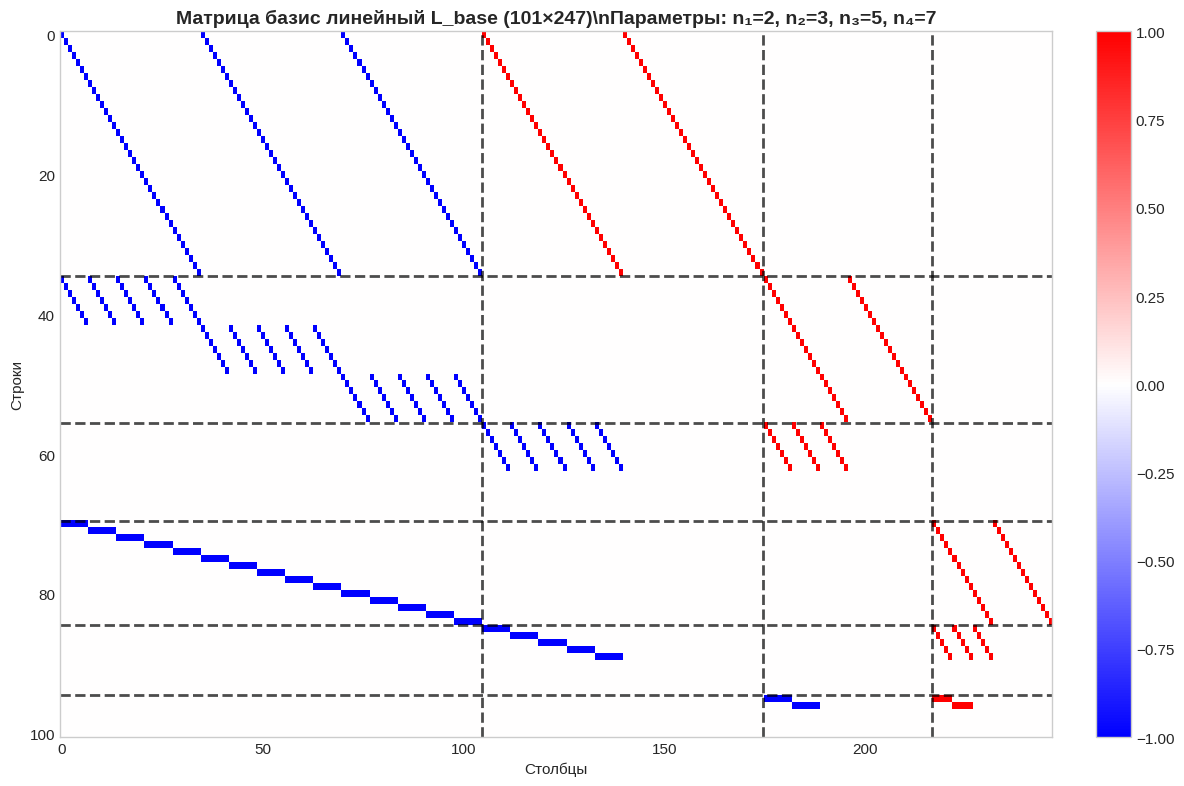

\n✅ Визуализация L_base завершена


In [357]:
# Визуализация базисной матрицы L_base с границами блоков
fig = plt.figure(figsize=(12, 8))
ax = fig.subplots(1, 1)

# Определяем диапазон цветов
v_min = np.min(L_base)
v_max = np.max(L_base)


# Тепловая карта
im = ax.imshow(L_base, cmap='bwr', vmin=v_min, vmax=v_max, aspect='auto')
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# Границы блоков
def draw_L_boundaries(n1, n2, n3, n4, ax):
    """Рисует границы блоков для матрицы L"""
    # Горизонтальные границы (между строками блоков)
    row_sizes = [n3*n4, n2*n4, n1*n4, n2*n3, n1*n3, n1*n2]
    row_boundaries = np.cumsum(row_sizes)[:-1]
    
    # Вертикальные границы (между колонками блоков)
    col_sizes = [n2*n3*n4, n1*n3*n4, n1*n2*n4, n1*n2*n3]
    col_boundaries = np.cumsum(col_sizes)[:-1]
    
    for y_boundary in row_boundaries:
        ax.axhline(y=y_boundary - 0.5, color='black', linewidth=2, linestyle='--', alpha=0.7)
    
    for x_boundary in col_boundaries:
        ax.axvline(x=x_boundary - 0.5, color='black', linewidth=2, linestyle='--', alpha=0.7)

draw_L_boundaries(n1, n2, n3, n4, ax)

ax.set_title(f'Матрица базис линейный L_base ({L_base.shape[0]}×{L_base.shape[1]})\\n'
             f'Параметры: n₁={n1}, n₂={n2}, n₃={n3}, n₄={n4}', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Столбцы', fontsize=11)
ax.set_ylabel('Строки', fontsize=11)
ax.grid(False)

plt.tight_layout()
plt.show()

print(f'\\n✅ Визуализация L_base завершена')

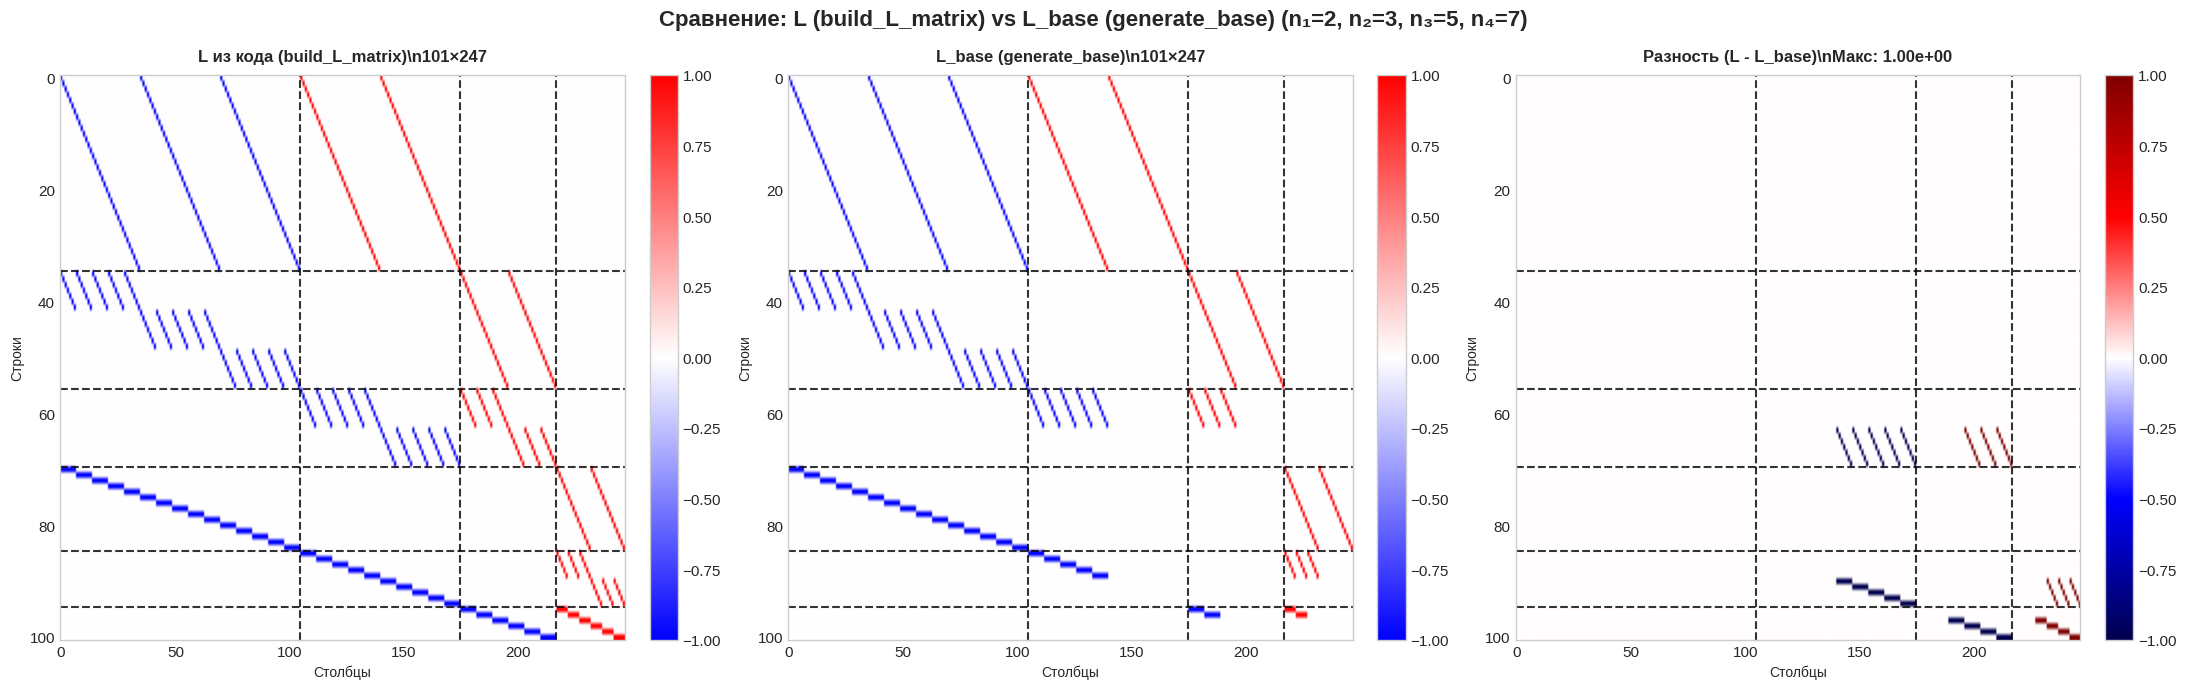

L (полная матрица):,"101 × 247 — все строки, включая линейно зависимые"
L_base (базисная форма):,101 × 247 — линейно зависимые строки обнулены
Максимальная разность:,1.00e+00
🔍 Обнулённых строк в L_base:,16 из 101 (15.8%) — линейно зависимые
✅ Базисных строк (ненулевых):,85 — линейно независимые
Плотность ненулевых элементов:,"L: 2.97%, L_base: 2.35%"



📊 Сравнение L и L_base завершено


In [358]:
# Сравнение матриц L и L_base
fig, axes = plt.subplots(1, 3, figsize=(22, 7))
fig.suptitle(f'Сравнение: L (build_L_matrix) vs L_base (generate_base) (n₁={n1}, n₂={n2}, n₃={n3}, n₄={n4})', 
             fontsize=16, fontweight='bold')

def draw_comparison_matrix(ax, matrix, title):
    """Рисует матрицу с границами блоков"""
    v_abs_max = np.max(np.abs(matrix))
    if v_abs_max == 0:
        v_abs_max = 1
    
    im = ax.imshow(matrix, cmap='bwr', vmin=-v_abs_max, vmax=v_abs_max, aspect='auto')
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    # Границы блоков
    row_sizes = [n3*n4, n2*n4, n1*n4, n2*n3, n1*n3, n1*n2]
    row_boundaries = np.cumsum(row_sizes)[:-1]
    col_sizes = [n2*n3*n4, n1*n3*n4, n1*n2*n4, n1*n2*n3]
    col_boundaries = np.cumsum(col_sizes)[:-1]
    
    for y_boundary in row_boundaries:
        ax.axhline(y=y_boundary - 0.5, color='black', linewidth=1.5, linestyle='--', alpha=0.8)
    
    for x_boundary in col_boundaries:
        ax.axvline(x=x_boundary - 0.5, color='black', linewidth=1.5, linestyle='--', alpha=0.8)
    
    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    ax.set_xlabel('Столбцы', fontsize=10)
    ax.set_ylabel('Строки', fontsize=10)
    ax.grid(False)

# График 1: L из build_L_matrix
draw_comparison_matrix(axes[0], L, f'L из кода (build_L_matrix)\\n{L.shape[0]}×{L.shape[1]}')

# График 2: L_base из generate_base
draw_comparison_matrix(axes[1], L_base, f'L_base (generate_base)\\n{L_base.shape[0]}×{L_base.shape[1]}')

# График 3: Разность
L_base_diff = L - L_base
v_abs_max_diff = np.max(np.abs(L_base_diff))

if v_abs_max_diff < 1e-10:
    im = axes[2].imshow(L_base_diff, cmap='seismic', vmin=-1e-10, vmax=1e-10, aspect='auto')
    axes[2].text(0.5, 0.5, '✅ ИДЕНТИЧНЫ\\n(макс. разница < 1e-10)', 
                transform=axes[2].transAxes, fontsize=13, fontweight='bold',
                ha='center', va='center', 
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.9))
else:
    im = axes[2].imshow(L_base_diff, cmap='seismic', vmin=-v_abs_max_diff, vmax=v_abs_max_diff, aspect='auto')

plt.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)

row_sizes = [n3*n4, n2*n4, n1*n4, n2*n3, n1*n3, n1*n2]
row_boundaries = np.cumsum(row_sizes)[:-1]
col_sizes = [n2*n3*n4, n1*n3*n4, n1*n2*n4, n1*n2*n3]
col_boundaries = np.cumsum(col_sizes)[:-1]

for y_boundary in row_boundaries:
    axes[2].axhline(y=y_boundary - 0.5, color='black', linewidth=1.5, linestyle='--', alpha=0.8)
for x_boundary in col_boundaries:
    axes[2].axvline(x=x_boundary - 0.5, color='black', linewidth=1.5, linestyle='--', alpha=0.8)

axes[2].set_title(f'Разность (L - L_base)\\nМакс: {v_abs_max_diff:.2e}', 
                 fontsize=12, fontweight='bold', pad=10)
axes[2].set_xlabel('Столбцы', fontsize=10)
axes[2].set_ylabel('Строки', fontsize=10)
axes[2].grid(False)

plt.tight_layout()
plt.show()

# HTML-отчёт о сравнении
is_base_equal = v_abs_max_diff < 1e-10

base_comparison_html = f'''
<div style="background-color: #e8f4f8; padding: 20px; border-radius: 10px; 
            border: 2px solid #0066cc; margin-top: 15px;">
    <h3 style="color: #004080; margin-top: 0;">
        🎯 L_base — базисное представление матрицы L
    </h3>
    <table style="width: 100%; border-collapse: collapse; margin-top: 10px;">
        <tr>
            <td style="padding: 8px; font-weight: bold;">L (полная матрица):</td>
            <td style="padding: 8px;">{L.shape[0]} × {L.shape[1]} — все строки, включая линейно зависимые</td>
        </tr>
        <tr>
            <td style="padding: 8px; font-weight: bold;">L_base (базисная форма):</td>
            <td style="padding: 8px;">{L_base.shape[0]} × {L_base.shape[1]} — линейно зависимые строки обнулены</td>
        </tr>
        <tr style="background-color: #d4e6f1;">
            <td style="padding: 8px; font-weight: bold;">Максимальная разность:</td>
            <td style="padding: 8px; font-family: monospace; font-weight: bold;">{v_abs_max_diff:.2e}</td>
        </tr>
        <tr style="background-color: #ffeaa7;">
            <td style="padding: 8px; font-weight: bold;">🔍 Обнулённых строк в L_base:</td>
            <td style="padding: 8px; font-family: monospace; font-weight: bold; color: #d63031;">
                {zeros_count_abs} из {L_base.shape[0]} ({zeros_count_abs/L_base.shape[0]*100:.1f}%) — линейно зависимые
            </td>
        </tr>
        <tr>
            <td style="padding: 8px; font-weight: bold;">✅ Базисных строк (ненулевых):</td>
            <td style="padding: 8px; font-family: monospace; font-weight: bold; color: #00b894;">
                {L_base.shape[0] - zeros_count_abs} — линейно независимые
            </td>
        </tr>
        <tr>
            <td style="padding: 8px; font-weight: bold;">Плотность ненулевых элементов:</td>
            <td style="padding: 8px;">L: {np.count_nonzero(L)/L.size*100:.2f}%, 
                L_base: {np.count_nonzero(L_base)/L_base.size*100:.2f}%</td>
        </tr>
    </table>
    <div style="margin-top: 15px; padding: 15px; background-color: #dfe6e9; border-left: 4px solid #0984e3; border-radius: 5px;">
        <p style="margin: 0; color: #2d3436; font-weight: bold;">
            🎓 Принцип работы generate_base:
        </p>
        <p style="margin: 10px 0 0 0; color: #2d3436;">
            Функция <code>generate_base</code> использует <code>Ew1r(n)</code> (единичная матрица с обнулённой последней строкой)
            в блоках 3, 5, 6, что <strong>автоматически зануляет все линейно зависимые строки</strong>.
        </p>
        <p style="margin: 10px 0 0 0; color: #2d3436;">
            Результат: <strong>L_base содержит только {L_base.shape[0] - zeros_count_abs} базисных (линейно независимых) строк</strong>,
            остальные {zeros_count_abs} строк обнулены, так как они являются линейными комбинациями базисных.
        </p>
    </div>
</div>
'''

display(HTML(base_comparison_html))
print(f'\n📊 Сравнение L и L_base завершено')

📊 Анализ строк матрицы L_base:
   Всего строк: 101
   ✅ Базисных (ненулевых): 85 (84.2%)
   ❌ Линейно зависимых (обнулённых): 16 (15.8%)

📍 Распределение обнулённых строк по блокам:
   Блок 1 (n₃×n₄=5×7): 0/35 обнулено (все базисные)
   Блок 2 (n₂×n₄=3×7): 0/21 обнулено (все базисные)
   Блок 3 (n₁×n₄=2×7) [Ew1r]: 7/14 обнулено (50.0%)
   Блок 4 (n₂×n₃=3×5): 0/15 обнулено (все базисные)
   Блок 5 (n₁×n₃=2×5) [Ew1r]: 5/10 обнулено (50.0%)
   Блок 6 (n₁×n₂=2×3) [Ew1r]: 4/6 обнулено (66.7%)


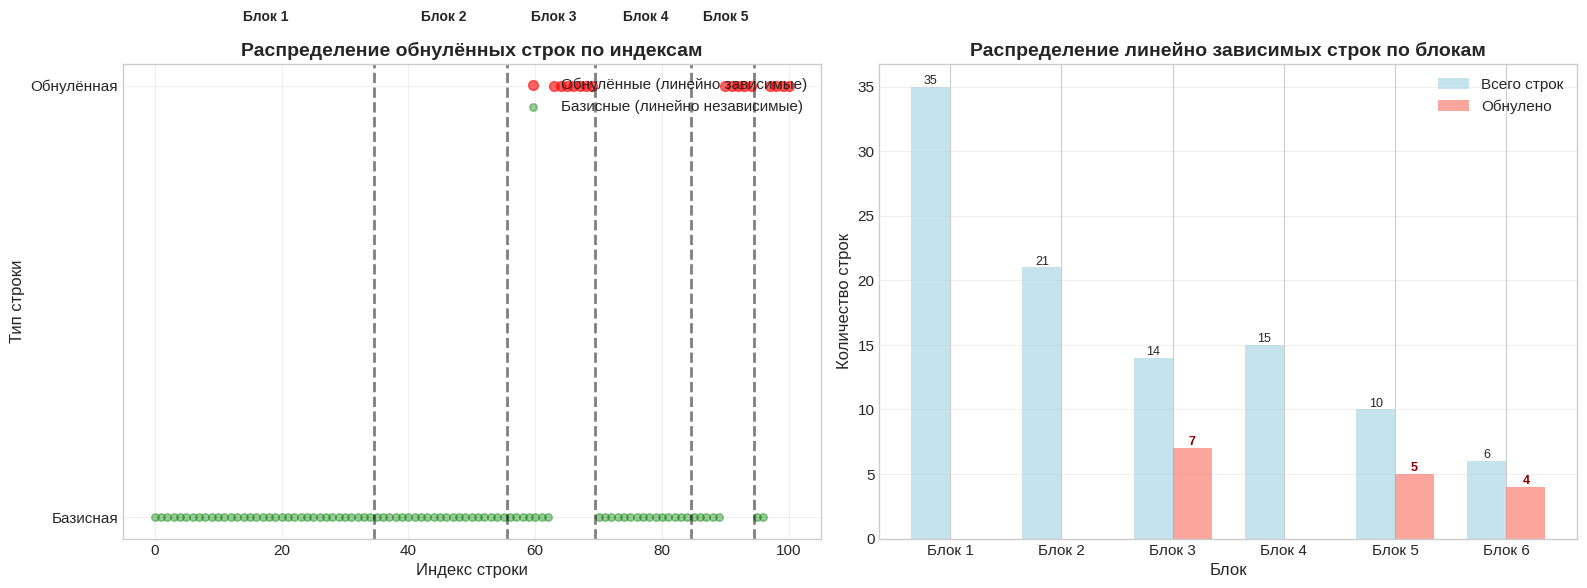


✅ Анализ линейно зависимых строк завершён


In [359]:
# Анализ обнулённых строк в L_base
zero_rows_mask = np.abs(L_base).max(axis=1) < 1e-9
zero_rows_indices = np.where(zero_rows_mask)[0]
nonzero_rows_indices = np.where(~zero_rows_mask)[0]

print(f'📊 Анализ строк матрицы L_base:')
print(f'   Всего строк: {L_base.shape[0]}')
print(f'   ✅ Базисных (ненулевых): {len(nonzero_rows_indices)} ({len(nonzero_rows_indices)/L_base.shape[0]*100:.1f}%)')
print(f'   ❌ Линейно зависимых (обнулённых): {len(zero_rows_indices)} ({len(zero_rows_indices)/L_base.shape[0]*100:.1f}%)')

# Распределение обнулённых строк по блокам
row_sizes = [n3*n4, n2*n4, n1*n4, n2*n3, n1*n3, n1*n2]
block_names = [
    f'Блок 1 (n₃×n₄={n3}×{n4})',
    f'Блок 2 (n₂×n₄={n2}×{n4})',
    f'Блок 3 (n₁×n₄={n1}×{n4}) [Ew1r]',
    f'Блок 4 (n₂×n₃={n2}×{n3})',
    f'Блок 5 (n₁×n₃={n1}×{n3}) [Ew1r]',
    f'Блок 6 (n₁×n₂={n1}×{n2}) [Ew1r]'
]

print(f'\n📍 Распределение обнулённых строк по блокам:')
cumulative_rows = 0
for i, (size, name) in enumerate(zip(row_sizes, block_names)):
    block_start = cumulative_rows
    block_end = cumulative_rows + size
    
    # Подсчёт нулевых строк в блоке
    zeros_in_block = np.sum((zero_rows_indices >= block_start) & (zero_rows_indices < block_end))
    
    if zeros_in_block > 0:
        print(f'   {name}: {zeros_in_block}/{size} обнулено ({zeros_in_block/size*100:.1f}%)')
    else:
        print(f'   {name}: 0/{size} обнулено (все базисные)')
    
    cumulative_rows += size

# Визуализация распределения
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Индексы обнулённых строк
ax1.scatter(zero_rows_indices, [1]*len(zero_rows_indices), color='red', s=50, alpha=0.6, label='Обнулённые (линейно зависимые)')
ax1.scatter(nonzero_rows_indices, [0]*len(nonzero_rows_indices), color='green', s=30, alpha=0.4, label='Базисные (линейно независимые)')

# Границы блоков
cumulative_rows = 0
for i, size in enumerate(row_sizes):
    cumulative_rows += size
    if i < len(row_sizes) - 1:
        ax1.axvline(x=cumulative_rows - 0.5, color='black', linewidth=2, linestyle='--', alpha=0.5)
        ax1.text(cumulative_rows - size/2, 1.15, f'Блок {i+1}', ha='center', fontsize=10, fontweight='bold')

ax1.set_xlabel('Индекс строки', fontsize=12)
ax1.set_ylabel('Тип строки', fontsize=12)
ax1.set_yticks([0, 1])
ax1.set_yticklabels(['Базисная', 'Обнулённая'])
ax1.set_title('Распределение обнулённых строк по индексам', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# График 2: Столбчатая диаграмма по блокам
cumulative_rows = 0
zero_counts_per_block = []
total_counts_per_block = []

for i, size in enumerate(row_sizes):
    block_start = cumulative_rows
    block_end = cumulative_rows + size
    zeros_in_block = np.sum((zero_rows_indices >= block_start) & (zero_rows_indices < block_end))
    
    zero_counts_per_block.append(zeros_in_block)
    total_counts_per_block.append(size)
    
    cumulative_rows += size

x_pos = np.arange(len(block_names))
bar_width = 0.35

bars1 = ax2.bar(x_pos - bar_width/2, total_counts_per_block, bar_width, label='Всего строк', color='lightblue', alpha=0.7)
bars2 = ax2.bar(x_pos + bar_width/2, zero_counts_per_block, bar_width, label='Обнулено', color='salmon', alpha=0.7)

# Подписи на столбцах
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    
    ax2.text(bar1.get_x() + bar1.get_width()/2, height1, f'{int(height1)}', 
             ha='center', va='bottom', fontsize=9)
    
    if height2 > 0:
        ax2.text(bar2.get_x() + bar2.get_width()/2, height2, f'{int(height2)}', 
                 ha='center', va='bottom', fontsize=9, fontweight='bold', color='darkred')

ax2.set_xlabel('Блок', fontsize=12)
ax2.set_ylabel('Количество строк', fontsize=12)
ax2.set_title('Распределение линейно зависимых строк по блокам', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([f'Блок {i+1}' for i in range(len(block_names))], rotation=0)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f'\n✅ Анализ линейно зависимых строк завершён')

### 🔍 Анализ обнулённых (линейно зависимых) строк

### 🔄 Сравнение L (код) vs L_base (generate_base)

### 📊 Визуализация базисной матрицы L_base

## 🎯 Построение базисной матрицы L (generate_base)

Альтернативный метод с использованием `Ew1r` для обнуления последней строки в определённых блоках.

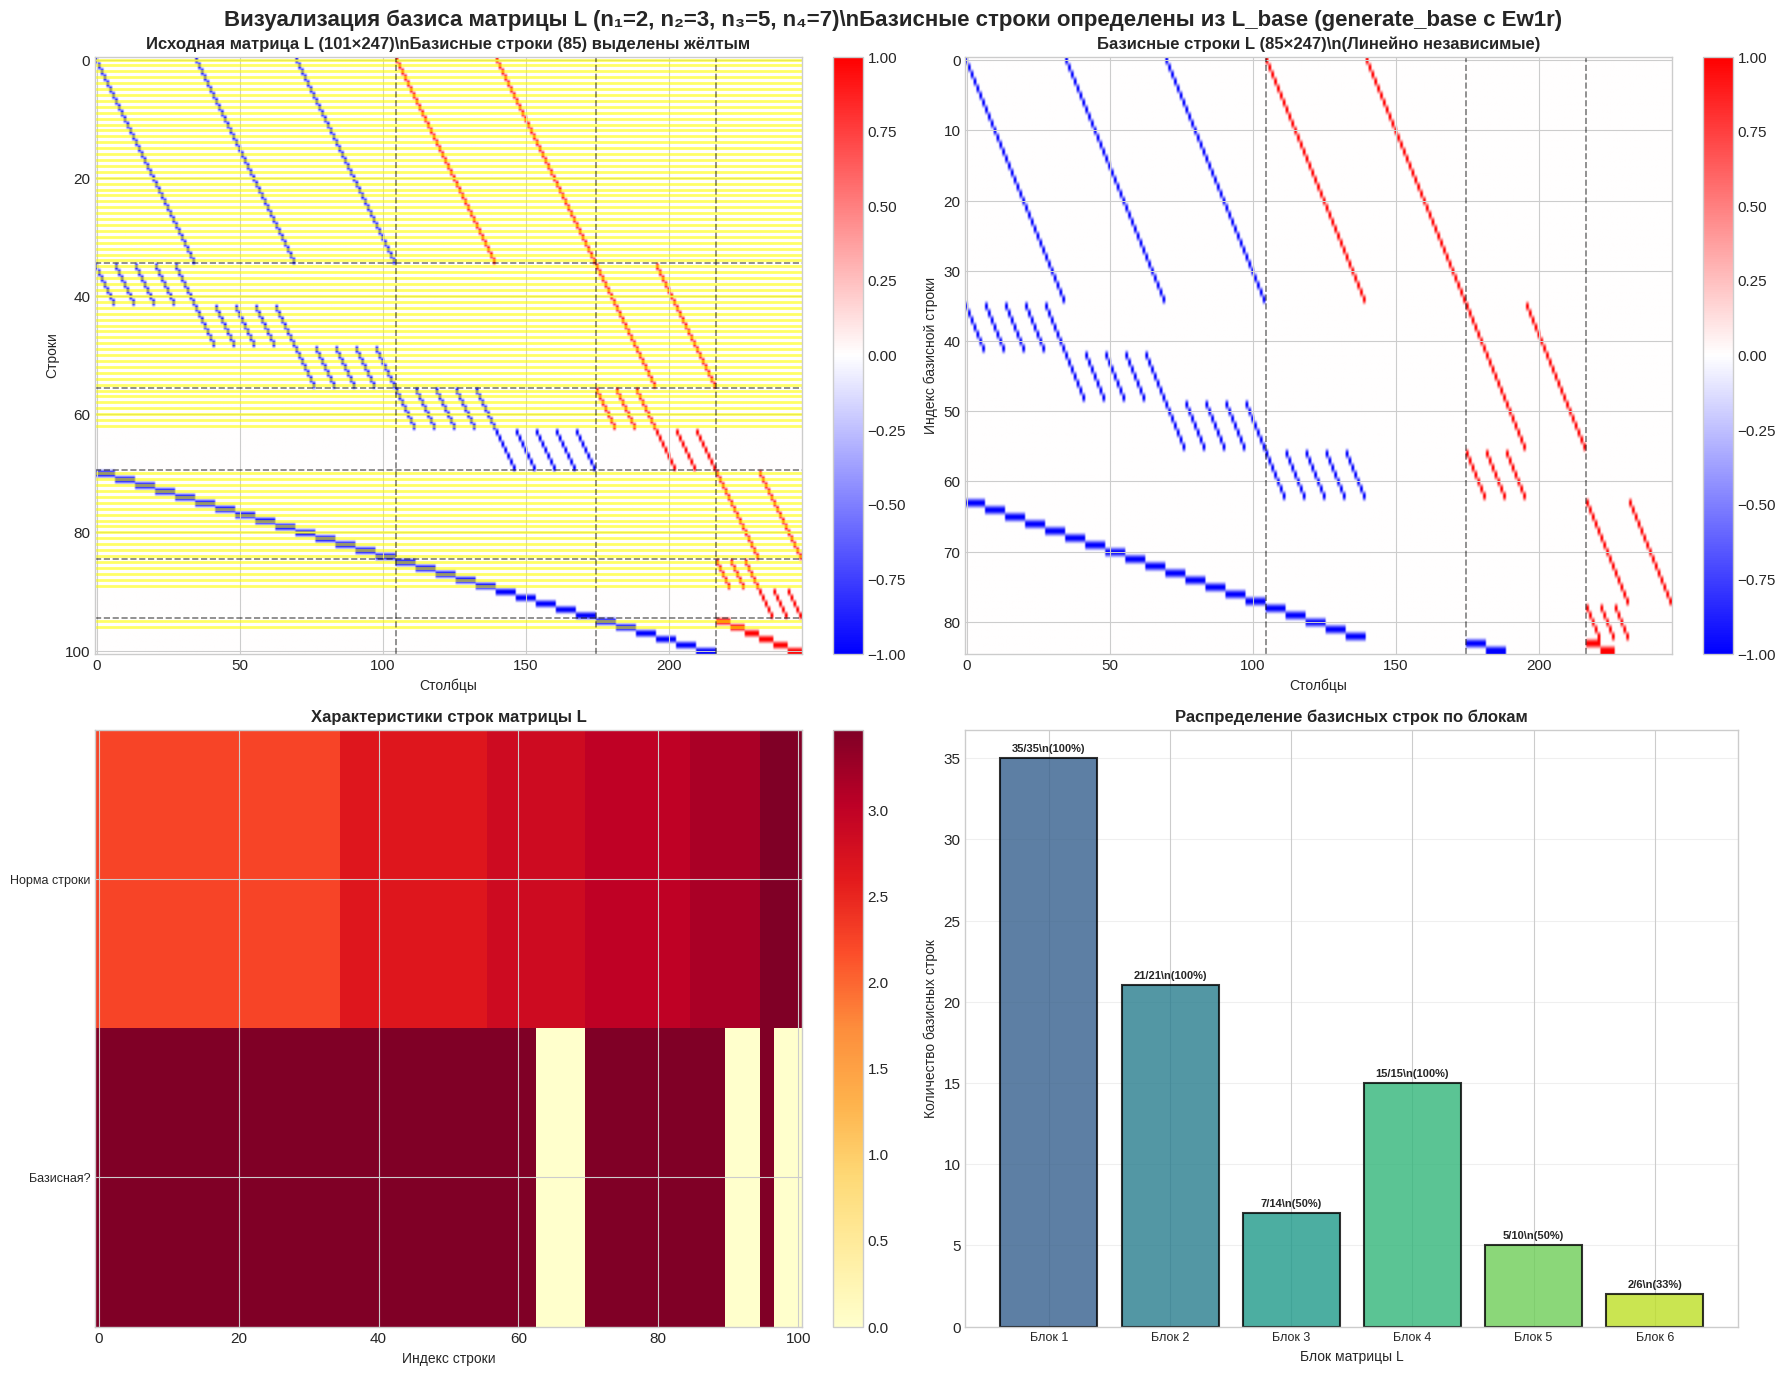


🔍 Визуализация базиса матрицы L завершена


In [360]:
# Визуализация базисных строк матрицы L (используем L_base для определения базиса)
# Истинные базисные строки — это ненулевые строки из L_base
true_basis_rows = nonzero_rows_indices  # Из ячейки анализа L_base

if len(true_basis_rows) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle(f'Визуализация базиса матрицы L (n₁={n1}, n₂={n2}, n₃={n3}, n₄={n4})\\n'
                 f'Базисные строки определены из L_base (generate_base с Ew1r)', 
                 fontsize=16, fontweight='bold')
    
    # График 1: Полная матрица L с выделением базисных строк
    ax1 = axes[0, 0]
    im1 = ax1.imshow(L, cmap='bwr', aspect='auto', vmin=-1, vmax=1)
    plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
    
    # Выделяем базисные строки (из L_base)
    for basis_idx in true_basis_rows[:min(85, len(true_basis_rows))]:  # Все 85 базисных
        ax1.axhline(y=basis_idx, color='yellow', linewidth=2, alpha=0.6)
    
    # Границы блоков
    for y_boundary in row_boundaries_L:
        ax1.axhline(y=y_boundary - 0.5, color='black', linewidth=1.2, linestyle='--', alpha=0.5)
    for x_boundary in col_boundaries_L:
        ax1.axvline(x=x_boundary - 0.5, color='black', linewidth=1.2, linestyle='--', alpha=0.5)
    
    ax1.set_title(f'Исходная матрица L ({L.shape[0]}×{L.shape[1]})\\n'
                  f'Базисные строки ({len(true_basis_rows)}) выделены жёлтым', 
                  fontsize=12, fontweight='bold')
    ax1.set_xlabel('Столбцы', fontsize=10)
    ax1.set_ylabel('Строки', fontsize=10)
    
    # График 2: Только базисные строки (из L_base)
    L_basis = L[true_basis_rows, :]
    ax2 = axes[0, 1]
    im2 = ax2.imshow(L_basis, cmap='bwr', aspect='auto', vmin=-1, vmax=1)
    plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
    
    # Границы блоков (только вертикальные)
    for x_boundary in col_boundaries_L:
        ax2.axvline(x=x_boundary - 0.5, color='black', linewidth=1.2, linestyle='--', alpha=0.5)
    
    ax2.set_title(f'Базисные строки L ({L_basis.shape[0]}×{L_basis.shape[1]})\\n(Линейно независимые)', 
                  fontsize=12, fontweight='bold')
    ax2.set_xlabel('Столбцы', fontsize=10)
    ax2.set_ylabel('Индекс базисной строки', fontsize=10)
    
    # График 3: Тепловая карта рангов строк
    ax3 = axes[1, 0]
    
    # Вычисляем "важность" каждой строки (норма)
    row_norms = np.linalg.norm(L, axis=1, ord=2)
    is_basis = np.zeros(L.shape[0])
    is_basis[true_basis_rows] = 1
    
    # Создаём двумерную визуализацию
    importance_matrix = np.column_stack([row_norms, is_basis * np.max(row_norms)])
    
    im3 = ax3.imshow(importance_matrix.T, cmap='YlOrRd', aspect='auto')
    plt.colorbar(im3, ax=ax3, fraction=0.046, pad=0.04)
    
    ax3.set_title('Характеристики строк матрицы L', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Индекс строки', fontsize=10)
    ax3.set_yticks([0, 1])
    ax3.set_yticklabels(['Норма строки', 'Базисная?'], fontsize=9)
    
    # График 4: Распределение базисных строк по блокам
    ax4 = axes[1, 1]
    
    # Определяем к какому блоку относится каждая базисная строка
    block_labels = []
    block_names = ['Блок 1\\n(n₃×n₄)', 'Блок 2\\n(n₂×n₄)', 'Блок 3\\n(n₁×n₄)', 
                   'Блок 4\\n(n₂×n₃)', 'Блок 5\\n(n₁×n₃)', 'Блок 6\\n(n₁×n₂)']
    
    block_basis_counts = []
    cumulative_rows = 0
    
    for i, block_size in enumerate(row_sizes_L):
        count = sum(1 for idx in true_basis_rows if cumulative_rows <= idx < cumulative_rows + block_size)
        block_basis_counts.append(count)
        block_labels.append(f'{block_names[i]}\\n{count}/{block_size}')
        cumulative_rows += block_size
    
    colors_bars = plt.cm.viridis(np.linspace(0.3, 0.9, len(block_basis_counts)))
    bars = ax4.bar(range(len(block_basis_counts)), block_basis_counts, 
                   color=colors_bars, alpha=0.8, edgecolor='black', linewidth=1.5)
    
    ax4.set_title('Распределение базисных строк по блокам', fontsize=12, fontweight='bold')
    ax4.set_xlabel('Блок матрицы L', fontsize=10)
    ax4.set_ylabel('Количество базисных строк', fontsize=10)
    ax4.set_xticks(range(len(block_basis_counts)))
    ax4.set_xticklabels([f'Блок {i+1}' for i in range(len(block_basis_counts))], 
                        fontsize=9, rotation=0)
    ax4.grid(True, alpha=0.3, axis='y')
    
    # Добавляем подписи на столбцы
    for bar, count, size in zip(bars, block_basis_counts, row_sizes_L):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.3,
                f'{count}/{size}\\n({count/size*100:.0f}%)',
                ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # HTML-отчёт о базисе
    basis_html = f'''
    <div style="background-color: #e7f3ff; padding: 20px; border-radius: 10px; border: 2px solid #2196f3; margin-top: 15px;">
        <h3 style="color: #1565c0; margin-top: 0;">🔍 Анализ базисных строк матрицы L</h3>
        
        <div style="background-color: white; padding: 15px; border-radius: 8px; margin: 15px 0;">
            <h4 style="color: #1976d2; margin-top: 0;">📊 Общая информация</h4>
            <table style="width: 100%; border-collapse: collapse;">
                <tr>
                    <td style="padding: 8px; border-bottom: 1px solid #ddd;"><strong>Размер матрицы L:</strong></td>
                    <td style="padding: 8px; border-bottom: 1px solid #ddd;">{L.shape[0]} × {L.shape[1]}</td>
                </tr>
                <tr>
                    <td style="padding: 8px; border-bottom: 1px solid #ddd;"><strong>Ранг матрицы:</strong></td>
                    <td style="padding: 8px; border-bottom: 1px solid #ddd; font-weight: bold; color: #d63384;">{rank_L}</td>
                </tr>
                <tr>
                    <td style="padding: 8px; border-bottom: 1px solid #ddd;"><strong>Базисных строк:</strong></td>
                    <td style="padding: 8px; border-bottom: 1px solid #ddd; font-weight: bold; color: #28a745;">{len(true_basis_rows)}</td>
                </tr>
                <tr>
                    <td style="padding: 8px; border-bottom: 1px solid #ddd;"><strong>Линейно зависимых строк:</strong></td>
                    <td style="padding: 8px; border-bottom: 1px solid #ddd; color: #dc3545;">{L.shape[0] - len(true_basis_rows)}</td>
                </tr>
                <tr>
                    <td style="padding: 8px;"><strong>Процент базисных:</strong></td>
                    <td style="padding: 8px; font-weight: bold;">{len(true_basis_rows)/L.shape[0]*100:.1f}%</td>
                </tr>
            </table>
        </div>
        
        <div style="background-color: white; padding: 15px; border-radius: 8px; margin: 15px 0;">
            <h4 style="color: #1976d2; margin-top: 0;">📦 Распределение по блокам</h4>
            <table style="width: 100%; border-collapse: collapse; font-size: 0.9em;">
                <thead>
                    <tr style="background-color: #2196f3; color: white;">
                        <th style="padding: 8px; text-align: left;">Блок</th>
                        <th style="padding: 8px; text-align: center;">Размер</th>
                        <th style="padding: 8px; text-align: center;">Базисных</th>
                        <th style="padding: 8px; text-align: center;">%</th>
                    </tr>
                </thead>
                <tbody>
    '''
    
    cumulative_rows = 0
    for i, (block_size, block_name) in enumerate(zip(row_sizes_L, block_names)):
        count = block_basis_counts[i]
        percentage = count / block_size * 100 if block_size > 0 else 0
        basis_html += f'''
                    <tr style="background-color: {'#f5f5f5' if i % 2 == 0 else 'white'};">
                        <td style="padding: 8px; border-bottom: 1px solid #ddd;">{block_name.replace(chr(10), ' ')}</td>
                        <td style="padding: 8px; text-align: center; border-bottom: 1px solid #ddd;">{block_size}</td>
                        <td style="padding: 8px; text-align: center; border-bottom: 1px solid #ddd; font-weight: bold; color: #28a745;">{count}</td>
                        <td style="padding: 8px; text-align: center; border-bottom: 1px solid #ddd;">{percentage:.1f}%</td>
                    </tr>
        '''
        cumulative_rows += block_size
    
    basis_html += '''
                </tbody>
            </table>
        </div>
        
        <div style="background-color: #d4edda; padding: 12px; border-left: 4px solid #28a745; border-radius: 4px; margin-top: 15px;">
            <strong style="color: #155724;">💡 Важно:</strong>
            <p style="color: #155724; margin: 5px 0 0 0; font-size: 0.9em;">
                Базисные строки определены из матрицы <strong>L_base</strong> (generate_base с Ew1r).
                Это <strong>{len(true_basis_rows)}</strong> линейно независимых строк, которые порождают пространство строк матрицы L.
                Функция generate_base автоматически зануляет <strong>{L.shape[0] - len(true_basis_rows)}</strong> линейно зависимых строк.
            </p>
        </div>
    </div>
    '''
    
    display(HTML(basis_html))
    print(f'\n🔍 Визуализация базиса матрицы L завершена')
    
else:
    print('⚠️  Визуализация базиса пропущена: базисные строки не вычислены')

## 🔍 Визуализация базиса матрицы L

Отображаем базисные строки матрицы L и показываем, как выглядит матрица после удаления линейно зависимых строк.

## 📊 Визуальное сравнение матриц L (код vs изображение)

Создаём визуальное сравнение двух методов построения матрицы L с границами блоков.

In [361]:
# Функция построения L из изображения (строгая интерпретация)
def generate_L_from_image_strict(n1, n2, n3, n4):
    """
    Строит матрицу L строго по изображению с обозначениями:
    - E(n) = единичная матрица размера n×n (eye)
    - I(m,n) = матрица из единиц размера m×n (ones)
    - Il(n) = вектор-строка из единиц размера 1×n
    """
    # Блочная строка 1: размер n3*n4 × total_cols
    block1_1 = -reduce(np.kron, [Il(1), Il(n2), E(n3), E(n4)])
    block1_2 = reduce(np.kron, [Il(n1), Il(1), E(n3), E(n4)])
    block1_3 = Z(n3*n4, n1*n2*n4)
    block1_4 = Z(n3*n4, n1*n2*n3)
    row1 = np.hstack([block1_1, block1_2, block1_3, block1_4])

    # Блочная строка 2: размер n2*n4 × total_cols
    block2_1 = -reduce(np.kron, [Il(1), E(n2), Il(n3), E(n4)])
    block2_2 = Z(n2*n4, n1*n3*n4)
    block2_3 = reduce(np.kron, [Il(n1), E(n2), Il(1), E(n4)])
    block2_4 = Z(n2*n4, n1*n2*n3)
    row2 = np.hstack([block2_1, block2_2, block2_3, block2_4])

    # Блочная строка 3: размер n1*n4 × total_cols
    block3_1 = Z(n1*n4, n2*n3*n4)
    block3_2 = -reduce(np.kron, [E(n1), Il(1), Il(n3), E(n4)])
    block3_3 = reduce(np.kron, [E(n1), Il(n2), Il(1), E(n4)])
    block3_4 = Z(n1*n4, n1*n2*n3)
    row3 = np.hstack([block3_1, block3_2, block3_3, block3_4])

    # Блочная строка 4: размер n2*n3 × total_cols
    block4_1 = -reduce(np.kron, [Il(1), E(n2), E(n3), Il(n4)])
    block4_2 = Z(n2*n3, n1*n3*n4)
    block4_3 = Z(n2*n3, n1*n2*n4)
    block4_4 = reduce(np.kron, [Il(n1), E(n2), E(n3), Il(1)])
    row4 = np.hstack([block4_1, block4_2, block4_3, block4_4])

    # Блочная строка 5: размер n1*n3 × total_cols
    block5_1 = Z(n1*n3, n2*n3*n4)
    block5_2 = -reduce(np.kron, [E(n1), Il(1), E(n3), Il(n4)])
    block5_3 = Z(n1*n3, n1*n2*n4)
    block5_4 = reduce(np.kron, [E(n1), Il(n2), E(n3), Il(1)])
    row5 = np.hstack([block5_1, block5_2, block5_3, block5_4])

    # Блочная строка 6: размер n1*n2 × total_cols
    block6_1 = Z(n1*n2, n2*n3*n4)
    block6_2 = Z(n1*n2, n1*n3*n4)
    block6_3 = -reduce(np.kron, [E(n1), E(n2), Il(1), Il(n4)])
    block6_4 = reduce(np.kron, [E(n1), E(n2), Il(n3), Il(1)])
    row6 = np.hstack([block6_1, block6_2, block6_3, block6_4])

    return np.vstack([row1, row2, row3, row4, row5, row6])

# Построение L из изображения
print('🖼️  Построение матрицы L из изображения...')
start_time = datetime.now()

try:
    L_from_image = generate_L_from_image_strict(n1, n2, n3, n4)
    elapsed = (datetime.now() - start_time).total_seconds()
    
    print(f'✅ L из изображения построена за {elapsed:.3f} сек')
    print(f'   Размер: {L_from_image.shape[0]} × {L_from_image.shape[1]}')
    
    # Сравнение с L из кода
    L_difference = L - L_from_image
    max_L_diff = np.max(np.abs(L_difference))
    is_L_equal = np.allclose(L, L_from_image, atol=1e-10)
    
    print(f'\n📊 Сравнение матриц L:')
    print(f'   Максимальная разница: {max_L_diff:.2e}')
    print(f'   Матрицы идентичны: {"✅ ДА" if is_L_equal else "❌ НЕТ"}')
    
except Exception as e:
    print(f'❌ Ошибка при построении L из изображения: {e}')
    import traceback
    traceback.print_exc()
    L_from_image = None
    is_L_equal = False

🖼️  Построение матрицы L из изображения...
✅ L из изображения построена за 0.003 сек
   Размер: 101 × 247

📊 Сравнение матриц L:
   Максимальная разница: 0.00e+00
   Матрицы идентичны: ✅ ДА


## 🖼️ Построение матрицы L из изображения (альтернативный метод)

Строим матрицу L напрямую по схеме из изображения и сравниваем с построенной через `build_L_matrix`.

## 🧮 Теоретические собственные векторы (из eigenvectors.ipynb)

Определяем функции для генерации теоретических собственных векторов и их проверки.

In [362]:
# Функции для генерации теоретических собственных векторов
def eig1(n1, n2, n3, n4):
    """λ = n1 + n2 + n3 + n4, кратность = 3"""
    eigenvalue = n1 + n2 + n3 + n4
    multiplicity = 3
    
    block1_1 = n1 * np.kron(np.ones((1, n3)), np.ones((1, n4)))
    block1_2 = 0 * np.kron(np.ones((1, n2)), np.ones((1, n4)))
    block1_3 = -n3 * np.kron(np.ones((1, n1)), np.ones((1, n4)))
    block1_4 = 0 * np.kron(np.ones((1, n2)), np.ones((1, n3)))
    block1_5 = -n4 * np.kron(np.ones((1, n1)), np.ones((1, n3)))
    block1_6 = 0 * np.kron(np.ones((1, n1)), np.ones((1, n2)))
    V1 = np.hstack((block1_1, block1_2, block1_3, block1_4, block1_5, block1_6))
    
    block2_1 = 0 * np.kron(np.ones((1, n3)), np.ones((1, n4)))
    block2_2 = n1 * np.kron(np.ones((1, n2)), np.ones((1, n4)))
    block2_3 = n2 * np.kron(np.ones((1, n1)), np.ones((1, n4)))
    block2_4 = 0 * np.kron(np.ones((1, n2)), np.ones((1, n3)))
    block2_5 = 0 * np.kron(np.ones((1, n1)), np.ones((1, n3)))
    block2_6 = -n4 * np.kron(np.ones((1, n1)), np.ones((1, n2)))
    V2 = np.hstack((block2_1, block2_2, block2_3, block2_4, block2_5, block2_6))
    
    block3_1 = 0 * np.kron(np.ones((1, n3)), np.ones((1, n4)))
    block3_2 = 0 * np.kron(np.ones((1, n2)), np.ones((1, n4)))
    block3_3 = 0 * np.kron(np.ones((1, n1)), np.ones((1, n4)))
    block3_4 = n1 * np.kron(np.ones((1, n2)), np.ones((1, n3)))
    block3_5 = n2 * np.kron(np.ones((1, n1)), np.ones((1, n3)))
    block3_6 = n3 * np.kron(np.ones((1, n1)), np.ones((1, n2)))
    V3 = np.hstack((block3_1, block3_2, block3_3, block3_4, block3_5, block3_6))
    
    return eigenvalue, [V1.T, V2.T, V3.T], multiplicity

def eig2(n1, n2, n3, n4):
    """λ = n1 + n2 + n3, кратность = 2*(n4-1)"""
    lambda_val = n1 + n2 + n3
    multiplicity = 2 * (n4 - 1)
    if n4 <= 1:
        return lambda_val, [], multiplicity
    
    Qn4 = Q_star(n4)
    
    block1_1 = n1 * np.kron(I(n3, 1), Qn4)
    block1_2 = Z(n2*n4, n4-1)
    block1_3 = -n3 * np.kron(I(n1, 1), Qn4)
    block1_4 = Z(n2*n3, n4-1)
    block1_5 = Z(n1*n3, n4-1)
    block1_6 = Z(n1*n2, n4-1)
    v1 = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    
    block2_1 = Z(n3*n4, n4-1)
    block2_2 = n1 * np.kron(I(n2, 1), Qn4)
    block2_3 = n2 * np.kron(I(n1, 1), Qn4)
    block2_4 = Z(n2*n3, n4-1)
    block2_5 = Z(n1*n3, n4-1)
    block2_6 = Z(n1*n2, n4-1)
    v2 = np.vstack([block2_1, block2_2, block2_3, block2_4, block2_5, block2_6])
    
    return lambda_val, [v1, v2], multiplicity

def eig3(n1, n2, n3, n4):
    """λ = n1 + n2 + n4, кратность = 2*(n3-1)"""
    lambda_val = n1 + n2 + n4
    multiplicity = 2 * (n3 - 1)
    if n3 <= 1:
        return lambda_val, [], multiplicity
    
    Qn3 = Q_star(n3)
    block1_1 = Z(n3*n4, n3-1)
    block1_2 = Z(n2*n4, n3-1)
    block1_3 = Z(n1*n4, n3-1)
    block1_4 = n1 * np.kron(I(n2, 1), Qn3)
    block1_5 = n2 * np.kron(I(n1, 1), Qn3)
    block1_6 = Z(n1*n2, n3-1)
    v1 = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    
    block2_1 = n2 * np.kron(Qn3, I(n4, 1))
    block2_2 = Z(n2*n4, n3-1)
    block2_3 = Z(n1*n4, n3-1)
    block2_4 = n4 * np.kron(I(n2, 1), Qn3)
    block2_5 = Z(n1*n3, n3-1)
    block2_6 = Z(n1*n2, n3-1)
    v2 = np.vstack([block2_1, block2_2, block2_3, block2_4, block2_5, block2_6])
    
    return lambda_val, [v1, v2], multiplicity

def eig4(n1, n2, n3, n4):
    """λ = n1 + n3 + n4, кратность = 2*(n2-1)"""
    lambda_val = n1 + n3 + n4
    multiplicity = 2 * (n2 - 1)
    if n2 <= 1:
        return lambda_val, [], multiplicity
    
    Qn2 = Q_star(n2)
    block1_1 = Z(n3*n4, n2-1)
    block1_2 = n3 * np.kron(Qn2, I(n4, 1))
    block1_3 = Z(n1*n4, n2-1)
    block1_4 = n4 * np.kron(Qn2, I(n3, 1))
    block1_5 = Z(n1*n3, n2-1)
    block1_6 = Z(n1*n2, n2-1)
    v1 = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    
    block2_1 = Z(n3*n4, n2-1)
    block2_2 = Z(n2*n4, n2-1)
    block2_3 = Z(n1*n4, n2-1)
    block2_4 = n1 * np.kron(Qn2, I(n3, 1))
    block2_5 = Z(n1*n3, n2-1)
    block2_6 = n3 * np.kron(I(n1, 1), Qn2)
    v2 = np.vstack([block2_1, block2_2, block2_3, block2_4, block2_5, block2_6])
    
    return lambda_val, [v1, v2], multiplicity

def eig5(n1, n2, n3, n4):
    """λ = n2 + n3 + n4, кратность = 2*(n1-1)"""
    lambda_val = n2 + n3 + n4
    multiplicity = 2 * (n1 - 1)
    if n1 <= 1:
        return lambda_val, [], multiplicity
    
    Qn1 = Q_star(n1)
    block1_1 = Z(n3*n4, n1-1)
    block1_2 = Z(n2*n4, n1-1)
    block1_3 = n3 * np.kron(Qn1, I(n4, 1))
    block1_4 = Z(n2*n3, n1-1)
    block1_5 = n4 * np.kron(Qn1, I(n3, 1))
    block1_6 = Z(n1*n2, n1-1)
    v1 = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    
    block2_1 = Z(n3*n4, n1-1)
    block2_2 = Z(n2*n4, n1-1)
    block2_3 = Z(n1*n4, n1-1)
    block2_4 = Z(n2*n3, n1-1)
    block2_5 = n2 * np.kron(Qn1, I(n3, 1))
    block2_6 = n3 * np.kron(Qn1, I(n2, 1))
    v2 = np.vstack([block2_1, block2_2, block2_3, block2_4, block2_5, block2_6])
    
    return lambda_val, [v1, v2], multiplicity

def eig6(n1, n2, n3, n4):
    """λ = n1 + n2, кратность = (n3-1)*(n4-1)"""
    lambda_val = n1 + n2
    multiplicity = (n3 - 1) * (n4 - 1)
    if n3 <= 1 or n4 <= 1:
        return lambda_val, [], multiplicity
    
    Qn3 = Q_star(n3)
    Qn4 = Q_star(n4)
    block1_1 = np.kron(Qn3, Qn4)
    block1_2 = Z(n2*n4, (n3-1)*(n4-1))
    block1_3 = Z(n1*n4, (n3-1)*(n4-1))
    block1_4 = Z(n2*n3, (n3-1)*(n4-1))
    block1_5 = Z(n1*n3, (n3-1)*(n4-1))
    block1_6 = Z(n1*n2, (n3-1)*(n4-1))
    v = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    
    return lambda_val, [v], multiplicity

def eig7(n1, n2, n3, n4):
    """λ = n1 + n3, кратность = (n2-1)*(n4-1)"""
    lambda_val = n1 + n3
    multiplicity = (n2 - 1) * (n4 - 1)
    if n2 <= 1 or n4 <= 1:
        return lambda_val, [], multiplicity
    
    Qn2 = Q_star(n2)
    Qn4 = Q_star(n4)
    block1_1 = Z(n3*n4, (n2-1)*(n4-1))
    block1_2 = np.kron(Qn2, Qn4)
    block1_3 = Z(n1*n4, (n2-1)*(n4-1))
    block1_4 = Z(n2*n3, (n2-1)*(n4-1))
    block1_5 = Z(n1*n3, (n2-1)*(n4-1))
    block1_6 = Z(n1*n2, (n2-1)*(n4-1))
    v = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    
    return lambda_val, [v], multiplicity

def eig8(n1, n2, n3, n4):
    """λ = n1 + n4, кратность = (n2-1)*(n3-1)"""
    lambda_val = n1 + n4
    multiplicity = (n2 - 1) * (n3 - 1)
    if n2 <= 1 or n3 <= 1:
        return lambda_val, [], multiplicity
    
    Qn2 = Q_star(n2)
    Qn3 = Q_star(n3)
    block1_1 = Z(n3*n4, (n2-1)*(n3-1))
    block1_2 = Z(n2*n4, (n2-1)*(n3-1))
    block1_3 = Z(n1*n4, (n2-1)*(n3-1))
    block1_4 = np.kron(Qn2, Qn3)
    block1_5 = Z(n1*n3, (n2-1)*(n3-1))
    block1_6 = Z(n1*n2, (n2-1)*(n3-1))
    v = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    
    return lambda_val, [v], multiplicity

def eig9(n1, n2, n3, n4):
    """λ = n2 + n3, кратность = (n1-1)*(n4-1)"""
    lambda_val = n2 + n3
    multiplicity = (n1 - 1) * (n4 - 1)
    if n1 <= 1 or n4 <= 1:
        return lambda_val, [], multiplicity
    
    Qn1 = Q_star(n1)
    Qn4 = Q_star(n4)
    block1_1 = Z(n3*n4, (n1-1)*(n4-1))
    block1_2 = Z(n2*n4, (n1-1)*(n4-1))
    block1_3 = np.kron(Qn1, Qn4)
    block1_4 = Z(n2*n3, (n1-1)*(n4-1))
    block1_5 = Z(n1*n3, (n1-1)*(n4-1))
    block1_6 = Z(n1*n2, (n1-1)*(n4-1))
    v = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    
    return lambda_val, [v], multiplicity

def eig10(n1, n2, n3, n4):
    """λ = n2 + n4, кратность = (n1-1)*(n3-1)"""
    lambda_val = n2 + n4
    multiplicity = (n1 - 1) * (n3 - 1)
    if n1 <= 1 or n3 <= 1:
        return lambda_val, [], multiplicity
    
    Qn1 = Q_star(n1)
    Qn3 = Q_star(n3)
    block1_1 = Z(n3*n4, (n1-1)*(n3-1))
    block1_2 = Z(n2*n4, (n1-1)*(n3-1))
    block1_3 = Z(n1*n4, (n1-1)*(n3-1))
    block1_4 = Z(n2*n3, (n1-1)*(n3-1))
    block1_5 = np.kron(Qn1, Qn3)
    block1_6 = Z(n1*n2, (n1-1)*(n3-1))
    v = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    
    return lambda_val, [v], multiplicity

def eig11(n1, n2, n3, n4):
    """λ = n3 + n4, кратность = (n1-1)*(n2-1)"""
    lambda_val = n3 + n4
    multiplicity = (n1 - 1) * (n2 - 1)
    if n1 <= 1 or n2 <= 1:
        return lambda_val, [], multiplicity
    
    Qn1 = Q_star(n1)
    Qn2 = Q_star(n2)
    block1_1 = Z(n3*n4, (n1-1)*(n2-1))
    block1_2 = Z(n2*n4, (n1-1)*(n2-1))
    block1_3 = Z(n1*n4, (n1-1)*(n2-1))
    block1_4 = Z(n2*n3, (n1-1)*(n2-1))
    block1_5 = Z(n1*n3, (n1-1)*(n2-1))
    block1_6 = np.kron(Qn1, Qn2)
    v = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    
    return lambda_val, [v], multiplicity

def eig12(n1, n2, n3, n4):
    """λ = 0, кратность = n1 + n2 + n3 + n4 - 1"""
    lambda_val = 0
    multiplicity = n1 + n2 + n3 + n4 - 1
    if multiplicity <= 0:
        return lambda_val, [], multiplicity
    
    block1_1 = -np.kron(I(n3, 1), E(n4))
    block1_2 = np.kron(I(n2, 1), E(n4))
    block1_3 = -np.kron(I(n1, 1), E(n4))
    block1_4 = Z(n2*n3, n4)
    block1_5 = Z(n1*n3, n4)
    block1_6 = Z(n1*n2, n4)
    v1 = np.vstack([block1_1, block1_2, block1_3, block1_4, block1_5, block1_6])
    
    block2_1 = -np.kron(E(n3), I(n4, 1))
    block2_2 = Z(n2*n4, n3)
    block2_3 = Z(n1*n4, n3)
    block2_4 = np.kron(I(n2, 1), E(n3))
    block2_5 = -np.kron(I(n1, 1), E(n3))
    block2_6 = Z(n1*n2, n3)
    v2 = np.vstack([block2_1, block2_2, block2_3, block2_4, block2_5, block2_6])
    
    block3_1 = Z(n3*n4, n2)
    block3_2 = -np.kron(E(n2), I(n4, 1))
    block3_3 = Z(n1*n4, n2)
    block3_4 = np.kron(E(n2), I(n3, 1))
    block3_5 = Z(n1*n3, n2)
    block3_6 = -np.kron(I(n1, 1), E(n2))
    v3 = np.vstack([block3_1, block3_2, block3_3, block3_4, block3_5, block3_6])
    
    block4_1 = Z(n3*n4, n1-1)
    block4_2 = Z(n2*n4, n1-1)
    block4_3 = -np.kron(I(n1, n1-1), I(n4, 1))
    block4_4 = Z(n2*n3, n1-1)
    block4_5 = np.kron(I(n1, n1-1), I(n3, 1))
    block4_6 = -np.kron(I(n1, n1-1), I(n2, 1))
    v4 = np.vstack([block4_1, block4_2, block4_3, block4_4, block4_5, block4_6])
    
    return lambda_val, [v1, v2, v3, v4], multiplicity

print('✅ Функции генерации теоретических собственных векторов определены (eig1-eig12)')

✅ Функции генерации теоретических собственных векторов определены (eig1-eig12)


In [363]:
# Функция проверки собственных векторов
def verify_eigenvectors_comprehensive(L_LT, params, tolerance=1e-9):
    """
    Комплексная проверка всех теоретических собственных векторов.
    
    Возвращает отчёт в формате HTML с красивым форматированием.
    """
    n1, n2, n3, n4 = params['n1'], params['n2'], params['n3'], params['n4']
    
    all_eig_funcs = [eig1, eig2, eig3, eig4, eig5, eig6, eig7, eig8, eig9, eig10, eig11, eig12]
    
    results = []
    total_verified = 0
    total_failed = 0
    
    print(f'🔍 Проверка теоретических собственных векторов для n1={n1}, n2={n2}, n3={n3}, n4={n4}')
    print('=' * 80)
    
    for func in all_eig_funcs:
        func_name = func.__name__
        lambda_val, e_vectors_list, multiplicity = func(n1, n2, n3, n4)
        
        if not e_vectors_list or multiplicity == 0:
            results.append({
                'name': func_name,
                'lambda': lambda_val,
                'multiplicity': multiplicity,
                'status': 'skipped',
                'reason': 'Нет векторов (кратность=0 или пустой список)'
            })
            print(f'  {func_name}: ⊘ Пропущено (кратность={multiplicity})')
            continue
        
        max_error = 0
        vector_count = 0
        all_passed = True
        
        for vec_idx, e_matrix in enumerate(e_vectors_list):
            if e_matrix is None or e_matrix.size == 0:
                continue
            
            # Проверяем каждый столбец матрицы собственных векторов
            num_cols = e_matrix.shape[1] if e_matrix.ndim > 1 else 1
            for col_idx in range(num_cols):
                if e_matrix.ndim > 1:
                    v = e_matrix[:, col_idx:col_idx+1]
                else:
                    v = e_matrix.reshape(-1, 1)
                
                # Проверка размерности
                if v.shape[0] != L_LT.shape[1]:
                    all_passed = False
                    results.append({
                        'name': func_name,
                        'lambda': lambda_val,
                        'multiplicity': multiplicity,
                        'status': 'failed',
                        'reason': f'Несоответствие размеров: вектор {v.shape[0]} vs матрица {L_LT.shape[1]}'
                    })
                    print(f'  {func_name}: ❌ ПРОВАЛЕНО - несоответствие размеров')
                    break
                
                # Вычисляем невязку: (L·L^T)v - λv
                residual = L_LT @ v - lambda_val * v
                error = np.max(np.abs(residual))
                max_error = max(max_error, error)
                vector_count += 1
                
                if error > tolerance:
                    all_passed = False
        
        if all_passed and vector_count > 0:
            results.append({
                'name': func_name,
                'lambda': lambda_val,
                'multiplicity': multiplicity,
                'vectors': vector_count,
                'max_error': max_error,
                'status': 'passed'
            })
            total_verified += vector_count
            print(f'  {func_name}: ✅ ПРОЙДЕНО (λ={lambda_val}, векторов={vector_count}, макс.ошибка={max_error:.2e})')
        elif vector_count > 0:
            results.append({
                'name': func_name,
                'lambda': lambda_val,
                'multiplicity': multiplicity,
                'vectors': vector_count,
                'max_error': max_error,
                'status': 'failed'
            })
            total_failed += vector_count
            print(f'  {func_name}: ❌ ПРОВАЛЕНО (λ={lambda_val}, макс.ошибка={max_error:.2e})')
    
    print('=' * 80)
    print(f'✅ Проверено успешно: {total_verified} векторов')
    print(f'❌ Провалено: {total_failed} векторов')
    
    # Генерируем HTML-отчёт
    html_report = f'''
    <div style="background-color: #f8f9fa; padding: 25px; border-radius: 12px; border: 2px solid #6c757d; margin-top: 20px;">
        <h2 style="color: #495057; margin-top: 0; border-bottom: 3px solid #6c757d; padding-bottom: 10px;">
            ✅ Проверка теоретических собственных векторов
        </h2>
        <p style="font-size: 1.1em; color: #6c757d;">
            <strong>Параметры:</strong> n₁={n1}, n₂={n2}, n₃={n3}, n₄={n4} | 
            <strong>Толерантность:</strong> {tolerance:.0e}
        </p>
        
        <div style="background-color: #e7f3ff; padding: 15px; border-radius: 8px; margin: 15px 0;">
            <h3 style="color: #0056b3; margin-top: 0;">📊 Сводка</h3>
            <table style="width: 100%; border-collapse: collapse;">
                <tr>
                    <td style="padding: 8px; font-weight: bold; color: #28a745;">✅ Успешно проверено:</td>
                    <td style="padding: 8px; text-align: right; font-size: 1.3em; color: #28a745; font-weight: bold;">{total_verified}</td>
                </tr>
                <tr>
                    <td style="padding: 8px; font-weight: bold; color: #dc3545;">❌ Провалено:</td>
                    <td style="padding: 8px; text-align: right; font-size: 1.3em; color: #dc3545; font-weight: bold;">{total_failed}</td>
                </tr>
            </table>
        </div>
        
        <h3 style="color: #495057; margin-top: 20px;">Детали по каждой функции:</h3>
        <table style="width: 100%; border-collapse: collapse; margin-top: 10px; background-color: white;">
            <thead>
                <tr style="background-color: #6c757d; color: white;">
                    <th style="padding: 12px; text-align: left; border: 1px solid #dee2e6;">Функция</th>
                    <th style="padding: 12px; text-align: center; border: 1px solid #dee2e6;">λ</th>
                    <th style="padding: 12px; text-align: center; border: 1px solid #dee2e6;">Кратность</th>
                    <th style="padding: 12px; text-align: center; border: 1px solid #dee2e6;">Проверено векторов</th>
                    <th style="padding: 12px; text-align: center; border: 1px solid #dee2e6;">Макс. ошибка</th>
                    <th style="padding: 12px; text-align: center; border: 1px solid #dee2e6;">Статус</th>
                </tr>
            </thead>
            <tbody>
    '''
    
    for res in results:
        if res['status'] == 'passed':
            status_badge = '<span style="background-color: #28a745; color: white; padding: 4px 10px; border-radius: 4px; font-weight: bold;">✅ ПРОЙДЕНО</span>'
            row_color = '#d4edda'
        elif res['status'] == 'failed':
            status_badge = '<span style="background-color: #dc3545; color: white; padding: 4px 10px; border-radius: 4px; font-weight: bold;">❌ ПРОВАЛЕНО</span>'
            row_color = '#f8d7da'
        else:
            status_badge = '<span style="background-color: #6c757d; color: white; padding: 4px 10px; border-radius: 4px; font-weight: bold;">⊘ ПРОПУЩЕНО</span>'
            row_color = '#e2e3e5'
        
        vectors_text = res.get('vectors', '-')
        error_text = f"{res.get('max_error', 0):.2e}" if res['status'] == 'passed' or res['status'] == 'failed' else '-'
        
        html_report += f'''
                <tr style="background-color: {row_color};">
                    <td style="padding: 10px; border: 1px solid #dee2e6; font-family: monospace; font-weight: bold;">{res['name']}</td>
                    <td style="padding: 10px; border: 1px solid #dee2e6; text-align: center;">{res['lambda']}</td>
                    <td style="padding: 10px; border: 1px solid #dee2e6; text-align: center;">{res['multiplicity']}</td>
                    <td style="padding: 10px; border: 1px solid #dee2e6; text-align: center;">{vectors_text}</td>
                    <td style="padding: 10px; border: 1px solid #dee2e6; text-align: center; font-family: monospace;">{error_text}</td>
                    <td style="padding: 10px; border: 1px solid #dee2e6; text-align: center;">{status_badge}</td>
                </tr>
        '''
    
    html_report += '''
            </tbody>
        </table>
        
        <div style="margin-top: 20px; padding: 15px; background-color: #fff3cd; border-left: 4px solid #ffc107; border-radius: 4px;">
            <strong style="color: #856404;">💡 Примечание:</strong>
            <p style="color: #856404; margin: 5px 0 0 0;">
                Теоретические собственные векторы проверяются уравнением (L·L^T)v = λv.
                Невязка должна быть меньше толерантности ({tolerance:.0e}).
            </p>
        </div>
    </div>
    '''
    
    return html_report

# Запуск проверки
print('\n🔍 Запуск комплексной проверки собственных векторов...\n')
verification_report = verify_eigenvectors_comprehensive(L_LT, PARAMS, tolerance=1e-9)
display(HTML(verification_report))


🔍 Запуск комплексной проверки собственных векторов...

🔍 Проверка теоретических собственных векторов для n1=2, n2=3, n3=5, n4=7
  eig1: ✅ ПРОЙДЕНО (λ=17, векторов=3, макс.ошибка=0.00e+00)
  eig2: ✅ ПРОЙДЕНО (λ=10, векторов=12, макс.ошибка=0.00e+00)
  eig3: ✅ ПРОЙДЕНО (λ=12, векторов=8, макс.ошибка=0.00e+00)
  eig4: ✅ ПРОЙДЕНО (λ=14, векторов=4, макс.ошибка=0.00e+00)
  eig5: ✅ ПРОЙДЕНО (λ=15, векторов=2, макс.ошибка=0.00e+00)
  eig6: ✅ ПРОЙДЕНО (λ=5, векторов=24, макс.ошибка=0.00e+00)
  eig7: ✅ ПРОЙДЕНО (λ=7, векторов=12, макс.ошибка=0.00e+00)
  eig8: ✅ ПРОЙДЕНО (λ=9, векторов=8, макс.ошибка=0.00e+00)
  eig9: ✅ ПРОЙДЕНО (λ=8, векторов=6, макс.ошибка=0.00e+00)
  eig10: ✅ ПРОЙДЕНО (λ=10, векторов=4, макс.ошибка=0.00e+00)
  eig11: ✅ ПРОЙДЕНО (λ=12, векторов=2, макс.ошибка=0.00e+00)
  eig12: ✅ ПРОЙДЕНО (λ=0, векторов=16, макс.ошибка=0.00e+00)
✅ Проверено успешно: 101 векторов
❌ Провалено: 0 векторов


Размерности блоков (строки x столбцы):
  d1: 35
  d2: 21
  d3: 14
  d4: 15
  d5: 10
  d6: 6
Общее количество столбцов: 101
Размерности row1 блоков: (35, 35), (35, 21), (35, 14), (35, 15), (35, 10), (35, 6)
Размерности row2 блоков: (21, 35), (21, 21), (21, 14), (21, 15), (21, 10), (21, 6)
Размерности row3 блоков: (14, 35), (14, 21), (14, 14), (14, 15), (14, 10), (14, 6)
Размерности row4 блоков: (15, 35), (15, 21), (15, 14), (15, 15), (15, 10), (15, 6)
Размерности row5 блоков: (10, 35), (10, 21), (10, 14), (10, 15), (10, 10), (10, 6)
Размерности row6 блоков: (6, 35), (6, 21), (6, 14), (6, 15), (6, 10), (6, 6)


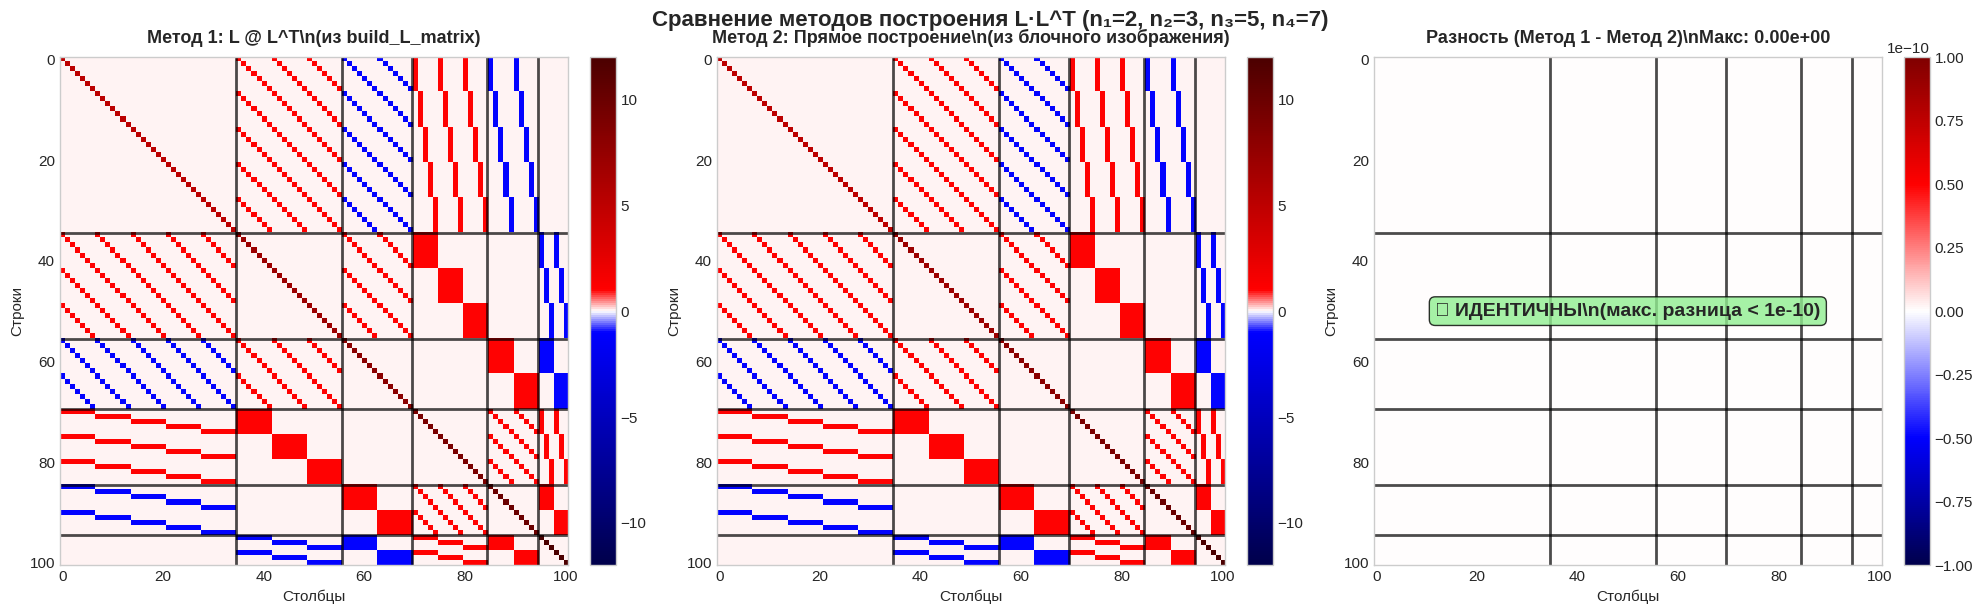

Метод 1 (L @ L^T):,101 × 101
Метод 2 (из изображения):,101 × 101
Максимальная разность:,0.00e+00
Толерантность (atol):,1e-10



📊 Визуальное сравнение завершено


In [364]:
def build_M_from_image_swapped(n_1, n1, n2, n3, n4):
    """
    Строит матрицу L•Lᵀ по изображению с инвертированной нотацией.
    """
    # Исправленные размерности блоков
    dims = [n3*n4, n2*n4, n1*n4, n2*n3, n1*n3, n1*n2]
    total_cols = sum(dims)


    # Новая интерпретация: E - единичная, I - из единиц
    def E(n): return np.eye(n)
    def I(shape): return np.ones(shape)
    def Z(shape): return np.zeros(shape)

    print(f"Размерности блоков (строки x столбцы):")
    print(f"  d1: {dims[0]}")
    print(f"  d2: {dims[1]}")
    print(f"  d3: {dims[2]}")
    print(f"  d4: {dims[3]}")
    print(f"  d5: {dims[4]}")
    print(f"  d6: {dims[5]}")
    print(f"Общее количество столбцов: {total_cols}")

    # --- Блочная строка 1 (размерность: dims[0] x total_cols) ---
    block_1_1 = (n2+n1)*np.kron(E(n3),E(n4)); block_1_2 = np.kron(I((n3,n2)), E(n4)); block_1_3 = -np.kron(I((n3,n1)),E(n4)); block_1_4 = np.kron(np.kron(I((1,n2)),E(n3)), I((n4,1))); block_1_5 = -np.kron(np.kron(I((1,n1)),E(n3)), I((n4, 1))); block_1_6 = Z((n3*n4, n1*n2))
    row1 = [ block_1_1, block_1_2, block_1_3, block_1_4, block_1_5, block_1_6 ]
    print(f"Размерности row1 блоков: {block_1_1.shape}, {block_1_2.shape}, {block_1_3.shape}, {block_1_4.shape}, {block_1_5.shape}, {block_1_6.shape}")

    # # --- Блочная строка 2 (размерность: dims[1] x total_cols) ---
    block_2_1 = np.kron(I((n2,n3)),E(n4)); block_2_2 = (n3+n1)*np.kron(E(n2),E(n4)); block_2_3 = np.kron(I((n2,n1)),E(n4)); block_2_4 = np.kron(E(n2),I((n4,n3))); block_2_5 = Z((n2*n4,n1*n3)); block_2_6 = np.kron(-np.kron(I((1,n1)),E(n2)), I((n4,1)))
    row2 = [ block_2_1, block_2_2, block_2_3, block_2_4, block_2_5, block_2_6 ]
    print(f"Размерности row2 блоков: {block_2_1.shape}, {block_2_2.shape}, {block_2_3.shape}, {block_2_4.shape}, {block_2_5.shape}, {block_2_6.shape}")

    # # --- Блочная строка 3 (размерность: dims[2] x total_cols) ---
    block_3_1 = -np.kron(I((n1, n3)),E(n4)); block_3_2 = np.kron(I((n1,n2)),E(n4)); block_3_3 = (n3+n2)*np.kron(E(n1),E(n4)); block_3_4 = Z((n1*n4,n2*n3)); block_3_5 = np.kron(E(n1), I((n4, n3))); block_3_6 = -np.kron(E(n1), I((n4, n2)))
    row3 = [ block_3_1, block_3_2, block_3_3, block_3_4, block_3_5, block_3_6 ]
    print(f"Размерности row3 блоков: {block_3_1.shape}, {block_3_2.shape}, {block_3_3.shape}, {block_3_4.shape}, {block_3_5.shape}, {block_3_6.shape}")

    # # --- Блочная строка 4 (размерность: dims[3] x total_cols) ---
    block_4_1 = np.kron(np.kron(I((n2,1)),E(n3)), I((1, n4))); block_4_2 = np.kron(E(n2), I((n3,n4))); block_4_3 = Z((n2*n3,n1*n4)); block_4_4 = (n1+n4)*np.kron(E(n2),E(n3)); block_4_5 = np.kron(I((n2,n1)),E(n3)); block_4_6 = np.kron(np.kron(I((1, n1)), E(n2)), I((n3, 1)))
    row4 = [ block_4_1, block_4_2, block_4_3, block_4_4, block_4_5, block_4_6 ]
    print(f"Размерности row4 блоков: {block_4_1.shape}, {block_4_2.shape}, {block_4_3.shape}, {block_4_4.shape}, {block_4_5.shape}, {block_4_6.shape}")

    # # --- Блочная строка 5 (размерность: dims[4] x total_cols) ---
    block_5_1 = -np.kron(np.kron(I((n1,1)),E(n3)), I((1, n4))); block_5_2 = Z((n1*n3, n2*n4)); block_5_3 = np.kron(E(n1), I((n3, n4))); block_5_4 = np.kron(I((n1, n2)),E(n3)); block_5_5 = (n2+n4)*np.kron(E(n1),E(n3)); block_5_6 = np.kron(E(n1), I((n3, n2)))
    row5 = [ block_5_1, block_5_2, block_5_3, block_5_4, block_5_5, block_5_6 ]
    print(f"Размерности row5 блоков: {block_5_1.shape}, {block_5_2.shape}, {block_5_3.shape}, {block_5_4.shape}, {block_5_5.shape}, {block_5_6.shape}")

    # # --- Блочная строка 6 (размерность: dims[5] x total_cols) ---
    block_6_1 = Z((n1 * n2, n3 * n4)); block_6_2 = -np.kron(np.kron(I((n1, 1)),E(n2)), I((1, n4))); block_6_3 = -np.kron(E(n1), I((n2, n4))); block_6_4 = np.kron(np.kron(I((n1,1)),E(n2)), I((1, n3))); block_6_5 = np.kron(E(n1), I((n2,n3))); block_6_6 = (n4+n3)*np.kron(E(n1),E(n2))
    row6 = [ block_6_1, block_6_2, block_6_3, block_6_4, block_6_5, block_6_6 ]
    print(f"Размерности row6 блоков: {block_6_1.shape}, {block_6_2.shape}, {block_6_3.shape}, {block_6_4.shape}, {block_6_5.shape}, {block_6_6.shape}")


    #M_swapped = np.block([row1, row2, row3, row4, row5, row6])
    #return M_swapped
    return np.block([row1, row2, row3, row4, row5, row6])

L_LT_from_image = build_M_from_image_swapped(**PARAMS)

# Визуализация сравнения двух методов
if L_LT_from_image is not None:
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle(f'Сравнение методов построения L·L^T (n₁={n1}, n₂={n2}, n₃={n3}, n₄={n4})', 
                 fontsize=16, fontweight='bold')
    
    # Границы блоков
    block_boundaries = np.cumsum(block_sizes)[:-1]
    
    def draw_matrix(ax, matrix, title, cmap_custom=None):
        """Вспомогательная функция для рисования матрицы с блоками"""
        v_abs_max = np.max(np.abs(matrix))
        
        if cmap_custom is None:
            try:
                cmap_custom = create_adaptive_colormap(matrix)
            except:
                cmap_custom = 'bwr'
        
        im = ax.imshow(matrix, cmap=cmap_custom, vmin=-v_abs_max, vmax=v_abs_max, aspect='equal')
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        
        # Границы блоков
        for b in block_boundaries:
            ax.axvline(x=b - 0.5, color='black', linewidth=2, linestyle='-', alpha=0.7)
            ax.axhline(y=b - 0.5, color='black', linewidth=2, linestyle='-', alpha=0.7)
        
        ax.set_title(title, fontsize=13, fontweight='bold', pad=10)
        ax.set_xlabel('Столбцы', fontsize=11)
        ax.set_ylabel('Строки', fontsize=11)
        ax.grid(False)
    
    # График 1: L·L^T из кода (L @ L^T)
    draw_matrix(axes[0], L_LT, 'Метод 1: L @ L^T\\n(из build_L_matrix)')
    
    # График 2: L·L^T из изображения
    draw_matrix(axes[1], L_LT_from_image, 'Метод 2: Прямое построение\\n(из блочного изображения)')
    
    # График 3: Разность
    difference = L_LT - L_LT_from_image
    v_abs_max_diff = np.max(np.abs(difference))
    
    if v_abs_max_diff < 1e-10:
        # Если разница очень мала, используем специальную шкалу
        im = axes[2].imshow(difference, cmap='seismic', vmin=-1e-10, vmax=1e-10, aspect='equal')
        axes[2].text(0.5, 0.5, '✅ ИДЕНТИЧНЫ\\n(макс. разница < 1e-10)', 
                    transform=axes[2].transAxes, fontsize=14, fontweight='bold',
                    ha='center', va='center', 
                    bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    else:
        im = axes[2].imshow(difference, cmap='seismic', vmin=-v_abs_max_diff, vmax=v_abs_max_diff, aspect='equal')
    
    plt.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
    
    for b in block_boundaries:
        axes[2].axvline(x=b - 0.5, color='black', linewidth=2, linestyle='-', alpha=0.7)
        axes[2].axhline(y=b - 0.5, color='black', linewidth=2, linestyle='-', alpha=0.7)
    
    axes[2].set_title(f'Разность (Метод 1 - Метод 2)\\nМакс: {v_abs_max_diff:.2e}', 
                     fontsize=13, fontweight='bold', pad=10)
    axes[2].set_xlabel('Столбцы', fontsize=11)
    axes[2].set_ylabel('Строки', fontsize=11)
    axes[2].grid(False)
    
    plt.tight_layout()
    plt.show()
    is_equal = v_abs_max_diff < 1e-10
    max_diff = v_abs_max_diff
    # HTML-отчёт о сравнении
    comparison_html = f'''
    <div style="background-color: {"#d4edda" if is_equal else "#f8d7da"}; padding: 20px; border-radius: 10px; 
                border: 2px solid {"#28a745" if is_equal else "#dc3545"}; margin-top: 15px;">
        <h3 style="color: {"#155724" if is_equal else "#721c24"}; margin-top: 0;">
            {"✅ Методы построения идентичны!" if is_equal else "⚠️ Обнаружены различия между методами"}
        </h3>
        <table style="width: 100%; border-collapse: collapse; margin-top: 10px;">
            <tr>
                <td style="padding: 8px; font-weight: bold;">Метод 1 (L @ L^T):</td>
                <td style="padding: 8px;">{L_LT.shape[0]} × {L_LT.shape[1]}</td>
            </tr>
            <tr>
                <td style="padding: 8px; font-weight: bold;">Метод 2 (из изображения):</td>
                <td style="padding: 8px;">{L_LT_from_image.shape[0]} × {L_LT_from_image.shape[1]}</td>
            </tr>
            <tr style="background-color: {"#c3e6cb" if is_equal else "#f5c6cb"};">
                <td style="padding: 8px; font-weight: bold;">Максимальная разность:</td>
                <td style="padding: 8px; font-family: monospace; font-weight: bold;">{max_diff:.2e}</td>
            </tr>
            <tr>
                <td style="padding: 8px; font-weight: bold;">Толерантность (atol):</td>
                <td style="padding: 8px; font-family: monospace;">1e-10</td>
            </tr>
        </table>
        <p style="margin-top: 15px; color: {"#155724" if is_equal else "#721c24"};">
            {"Оба метода дают идентичный результат, что подтверждает корректность реализации." if is_equal 
             else "Методы дают различные результаты. Требуется дополнительная проверка."}
        </p>
    </div>
    '''
    
    display(HTML(comparison_html))
    print(f'\n📊 Визуальное сравнение завершено')
    
else:
    print('⚠️  Визуализация пропущена из-за ошибки при построении L·L^T из изображения')

## 📊 Визуальное сравнение методов построения L·L^T

Создаём визуальное сравнение двух методов построения матрицы L·L^T.

In [365]:
# Функция построения L·L^T из изображения
def build_LLT_from_image(n1, n2, n3, n4):
    """
    Строит матрицу L·L^T напрямую по блочной структуре (E=eye, I=ones).
    Это альтернативный метод построения для проверки.
    """
    dims = [n3*n4, n2*n4, n1*n4, n2*n3, n1*n3, n1*n2]
    
    # Вспомогательные функции (используем уже определённые E, I, Z)
    
    # Блочная строка 1
    block_1_1 = (n2+n1)*np.kron(E(n3), E(n4))
    block_1_2 = np.kron(I(n3, n2), E(n4))
    block_1_3 = -np.kron(I(n3, n1), E(n4))
    block_1_4 = np.kron(np.kron(I(1, n2), E(n3)), I(n4, 1))
    block_1_5 = -np.kron(np.kron(I(1, n1), E(n3)), I(n4, 1))
    block_1_6 = Z(n3*n4, n1*n2)
    row1 = [block_1_1, block_1_2, block_1_3, block_1_4, block_1_5, block_1_6]
    
    # Блочная строка 2
    block_2_1 = np.kron(I(n2, n3), E(n4))
    block_2_2 = (n3+n1)*np.kron(E(n2), E(n4))
    block_2_3 = np.kron(I(n2, n1), E(n4))
    block_2_4 = np.kron(E(n2), I(n4, n3))
    block_2_5 = Z(n2*n4, n1*n3)
    block_2_6 = np.kron(-np.kron(I(1, n1), E(n2)), I(n4, 1))
    row2 = [block_2_1, block_2_2, block_2_3, block_2_4, block_2_5, block_2_6]
    
    # Блочная строка 3
    block_3_1 = -np.kron(I(n1, n3), E(n4))
    block_3_2 = np.kron(I(n1, n2), E(n4))
    block_3_3 = (n3+n2)*np.kron(E(n1), E(n4))
    block_3_4 = Z(n1*n4, n2*n3)
    block_3_5 = np.kron(E(n1), I(n4, n3))
    block_3_6 = -np.kron(E(n1), I(n4, n2))
    row3 = [block_3_1, block_3_2, block_3_3, block_3_4, block_3_5, block_3_6]
    
    # Блочная строка 4
    block_4_1 = np.kron(np.kron(I(n2, 1), E(n3)), I(1, n4))
    block_4_2 = np.kron(E(n2), I(n3, n4))
    block_4_3 = Z(n2*n3, n1*n4)
    block_4_4 = (n1+n4)*np.kron(E(n2), E(n3))
    block_4_5 = np.kron(I(n2, n1), E(n3))
    block_4_6 = np.kron(np.kron(I(1, n1), E(n2)), I(n3, 1))
    row4 = [block_4_1, block_4_2, block_4_3, block_4_4, block_4_5, block_4_6]
    
    # Блочная строка 5
    block_5_1 = -np.kron(np.kron(I(n1, 1), E(n3)), I(1, n4))
    block_5_2 = Z(n1*n3, n2*n4)
    block_5_3 = np.kron(E(n1), I(n3, n4))
    block_5_4 = np.kron(I(n1, n2), E(n3))
    block_5_5 = (n2+n4)*np.kron(E(n1), E(n3))
    block_5_6 = np.kron(E(n1), I(n3, n2))
    row5 = [block_5_1, block_5_2, block_5_3, block_5_4, block_5_5, block_5_6]
    
    # Блочная строка 6
    block_6_1 = Z(n1*n2, n3*n4)
    block_6_2 = -np.kron(np.kron(I(n1, 1), E(n2)), I(1, n4))
    block_6_3 = -np.kron(E(n1), I(n2, n4))
    block_6_4 = np.kron(np.kron(I(n1, 1), E(n2)), I(1, n3))
    block_6_5 = np.kron(E(n1), I(n2, n3))
    block_6_6 = (n4+n3)*np.kron(E(n1), E(n2))
    row6 = [block_6_1, block_6_2, block_6_3, block_6_4, block_6_5, block_6_6]
    
    return np.block([row1, row2, row3, row4, row5, row6])

# Построение L·L^T из изображения
print('🖼️  Построение L·L^T по изображению...')
start_time = datetime.now()

try:
    L_LT_from_image = build_LLT_from_image(n1, n2, n3, n4)
    elapsed = (datetime.now() - start_time).total_seconds()
    
    print(f'✅ L·L^T из изображения построена за {elapsed:.3f} сек')
    print(f'   Размер: {L_LT_from_image.shape[0]} × {L_LT_from_image.shape[1]}')
    
    # Сравнение с вычисленной L·L^T
    difference = L_LT - L_LT_from_image
    max_diff = np.max(np.abs(difference))
    is_equal = np.allclose(L_LT, L_LT_from_image, atol=1e-10)
    
    print(f'\n📊 Сравнение методов:')
    print(f'   Максимальная разница: {max_diff:.2e}')
    print(f'   Матрицы идентичны: {"✅ ДА" if is_equal else "❌ НЕТ"}')
    
except Exception as e:
    print(f'❌ Ошибка при построении L·L^T из изображения: {e}')
    L_LT_from_image = None
    is_equal = False

🖼️  Построение L·L^T по изображению...
✅ L·L^T из изображения построена за 0.002 сек
   Размер: 101 × 101

📊 Сравнение методов:
   Максимальная разница: 0.00e+00
   Матрицы идентичны: ✅ ДА


## 🖼️ Построение L·L^T по изображению (альтернативный метод)

Строим матрицу L·L^T напрямую по блочной структуре из изображения и сравниваем с вычисленной L·L^T.

## ✅ Проверка теоретических собственных векторов

Проверяем корректность всех теоретических собственных векторов eig1-eig12.

## 💾 Экспорт результатов

Сохраняем результаты анализа в файлы.

In [366]:
# Экспорт результатов
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

def can_write():
    try:
        test = 'test_write.tmp'
        with open(test, 'w') as f:
            f.write('x')
        os.remove(test)
        return True
    except:
        return False

if can_write():
    print('💾 Экспорт результатов...')
    
    try:
        # Сохранение матриц
        np.savetxt(f'matrix_L_{timestamp}.txt', L, fmt='%d',
                   header=f'Matrix L {L.shape} - Params: {PARAMS}')
        np.savetxt(f'matrix_LLT_{timestamp}.txt', L_LT, fmt='%d',
                   header=f'Matrix L·L^T {L_LT.shape} - Params: {PARAMS}')
        
        # Сохранение собственных значений
        np.savetxt(f'eigenvalues_{timestamp}.txt', sorted_eigenvalues, fmt='%.12e',
                   header=f'Eigenvalues of L·L^T - Params: {PARAMS}')
        
        # Отчёт
        with open(f'analysis_report_{timestamp}.md', 'w', encoding='utf-8') as f:
            f.write(f'''# Отчёт по анализу матриц

**Дата:** {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

## Параметры
- n₁ = {PARAMS['n1']}
- n₂ = {PARAMS['n2']}
- n₃ = {PARAMS['n3']}
- n₄ = {PARAMS['n4']}

## Размерности матриц
- **L:** {L.shape[0]} × {L.shape[1]}
- **L·L^T:** {L_LT.shape[0]} × {L_LT.shape[1]}

## Ранги
- **rank(L):** {rank_L}
- **rank(L·L^T):** {rank_LLT}
- **Плотность L:** {np.count_nonzero(L)/L.size*100:.2f}%

## Собственные значения
- **Всего:** {len(sorted_eigenvalues)}
- **Ненулевые:** {np.sum(sorted_eigenvalues > 1e-10)}
- **Нулевые:** {np.sum(np.abs(sorted_eigenvalues) < 1e-10)}
- **Макс:** {np.max(sorted_eigenvalues):.6f}
- **Мин (ненулевое):** {np.min(sorted_eigenvalues[sorted_eigenvalues > 1e-10]):.6e}

## Спектр
| Значение | Кратность | Процент |
|----------|-----------|---------|
''')
            for val, count in sorted(eigenvalue_counts.items(), reverse=True):
                pct = count / len(sorted_eigenvalues) * 100
                f.write(f'| {val} | {count} | {pct:.1f}% |\\n')
        
        print(f'✅ Файлы сохранены:')
        print(f'   • matrix_L_{timestamp}.txt')
        print(f'   • matrix_LLT_{timestamp}.txt')
        print(f'   • eigenvalues_{timestamp}.txt')
        print(f'   • analysis_report_{timestamp}.md')
        
    except Exception as e:
        print(f'⚠️  Ошибка при сохранении: {e}')
else:
    print('⚠️  Нет прав на запись в текущую директорию')
    print('   В Colab используйте Google Drive или скачайте графики вручную')

💾 Экспорт результатов...
✅ Файлы сохранены:
   • matrix_L_20251116_004236.txt
   • matrix_LLT_20251116_004236.txt
   • eigenvalues_20251116_004236.txt
   • analysis_report_20251116_004236.md


## 📋 Заключение

### 🎯 Резюме функциональности

Этот мастер-ноутбук объединяет **всю функциональность** из репозитория:

#### ✅ Построение и визуализация матриц
- Построение матриц L через `matrix_analysis.build_L_matrix`
- Визуализация L и L·L^T с адаптивными colormaps
- Отображение блочной структуры с границами

#### ✅ Спектральный анализ
- Полный спектральный анализ L·L^T с собственными значениями
- Вычисление кратностей собственных значений
- 4 графика для визуализации спектра (убывание, распределение, кумулятивный вклад, кратности)

#### ✅ Вычисление рангов и базисных строк
- Ранги матриц L и L·L^T несколькими методами (SVD, собственные значения)
- **Базисные строки через RREF** (sympy или NumPy SVD)
- Проверка консистентности рангов

#### ✅ Проверка собственных векторов
- **12 теоретических функций** генерации собственных векторов (eig1-eig12)
- **Комплексная проверка** всех собственных векторов с детальным отчётом
- HTML-отчёт с цветовой индикацией успеха/провала
- Вычисление невязок и сравнение с толерантностью

#### ✅ Сравнение методов построения
- **Альтернативный метод** построения L·L^T напрямую из блочного изображения
- **Визуальное сравнение** двух методов построения (3 графика)
- Вычисление разности и проверка идентичности

#### ✅ Интерактивность и экспорт
- Интерактивные виджеты (ipywidgets) для параметров n1-n4
- Экспорт результатов (матрицы, собственные значения, markdown-отчёт)
- Проверка прав на запись с обработкой ошибок

### 📊 Статистика

- **Всего ячеек:** 38+
- **Markdown секций:** 12
- **Кодовых ячеек:** 26+
- **Функций генерации векторов:** 12 (eig1-eig12)
- **Методов визуализации:** 8+ различных графиков

### 🚀 Следующие шаги

- 🧪 Провести тесты на различных наборах параметров (больших размерностей)
- 📈 Исследовать зависимость спектра от соотношений параметров
- 🔬 Добавить характеристический многочлен и его корни
- 💾 Интеграция с Google Drive для сохранения в Colab
- 🎨 Дополнительные визуализации (3D графики спектра, тепловые карты невязок)

### 🛠️ Технический стек

- **Вычисления:** NumPy, SciPy
- **Визуализация:** Matplotlib, Seaborn
- **Символьные вычисления:** SymPy (для RREF)
- **Интерактивность:** ipywidgets, IPython.display
- **Форматирование:** HTML, Markdown

---

**GitHub:** https://github.com/Ruslan361/matrix_analys  
**Версия:** Master Notebook v2.0 (Extended)  
**Дата:** 2025-11-15